# Cognitive Services Personalizer 
https://github.com/Azure-Samples/cognitive-services-personalizer-samples

このチュートリアルでは、顧客がどのタイプのコーヒーを注文すべきかを提案する Personalizer ループシステム をシミュレートしています。ユーザーとその好みは、[user dataset](users.json)に保存されます。コーヒーに関する情報は、[coffee dataset](coffee.json)にも格納されています。

このノートブックは、ユーザーが Web サイトで行う対話操作をシミュレートし、データセットからランダムなユーザー、時間帯、天気の種類を選択します。 ユーザー情報の概要は次のとおりです。

|顧客  コンテキスト|時間帯|天気|
|--|--|--|
|Alice<br>Bob<br>Cathy<br>Dave|朝<br>午後<br>夜|晴れ<br>雨<br>雪| 

Personalizer が時間の経過と共に学習できるよう、この "システム" は各人物のコーヒーの選択に関する情報も把握しています。

|コーヒー - アクションの特徴|温度の種類|原産地|焙煎の種類|オーガニック|
|--|--|--|--|--|
|カプチーノ|ホット|ケニア|深煎り|オーガニック|
|コールド ブリュー|アイス|ブラジル|浅煎り|オーガニック|
|アイス モカ|アイス|エチオピア|浅煎り|オーガニックでない|
|ラテ|ホット|ブラジル|深煎り|オーガニックでない|
 
Personalizer ループの**目的**は、できるだけ多くの場合にユーザーと最も相性の良いコーヒーを見つけることです。
このチュートリアルのコードは、[Personalizer Samples GitHub リポジトリ](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/blob/master/samples/azurenotebook/Personalization.ipynb)にあります。

## シミュレーションの仕組み

実行中のシステムの開始時点では、Personalizer からの提案がうまくいくのはたった 20% から 30% です。 この成功は、Personalizer の Reward API に返される報酬 (スコアは 1) によって示されます。 いくつかの Rank と Reward の呼び出しの後、システムは改善されます。

最初の 10,000 リクエストの後、オフライン評価を実行します。これにより、Personalizer がデータを見直し、より良い学習ポリシーを提案することができます。新しい学習ポリシーを適用し、2,000 リクエストでノートを再度実行します。ループのパフォーマンスが向上します。

## ランク(Rank)と報酬(Reward)の呼び出し

Personalizer サービスへの数千回の呼び出しごとに、ノートブックは **Rank** リクエストを REST API に送信します。

* ランクまたはリクエストイベントの一意のID
* コンテキスト: ランダムに選択したユーザー、天気、時間帯 - ウェブサイトやモバイルデバイス上のユーザーをシミュレートします。
* アクションと特徴量: Personalizer が提案する際に基づく "すべて" のコーヒーデータ

システムは、コーヒーの選択肢のランクを受け取り、その予測と、同じ時間帯と天候についてのユーザーの既知の選択肢を比較します。既知の選択肢が予測された選択肢と同じであれば、 **Reward** 1 が Personalizer に送られます。そうでない場合、報酬は 0 です。

> [!注意]
> これはシミュレーションなので、報酬のアルゴリズムはシンプルです。実際のシナリオでは、このアルゴリズムは、報酬スコアを決定するためにビジネス ロジックを使用する必要があります (場合によっては、顧客の経験のさまざまな側面に対する重みが使用されます)。

## 前提条件

* [Azure Personalizer リソース](https://ms.portal.azure.com/#create/Microsoft.CognitiveServicesPersonalizer) です。
    * すでにPersonalizerリソースを使用している場合は、そのリソースの Azure ポータルで[データをクリア](https://docs.microsoft.com/en-us/azure/cognitive-services/personalizer/how-to-settings#clear-data-for-your-learning-loop)してください。
* [このサンプル](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/tree/master/samples/azurenotebook) のすべてのファイルをAzure Notebookプロジェクトにアップロードします。 


ファイルの説明。

* [Personalizer.ipynb](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/blob/master/samples/azurenotebook/Personalization.ipynb) は、このチュートリアルのための Jupyter ノートブックです。
* [User dataset](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/blob/master/samples/azurenotebook/users.json) は JSON オブジェクトに格納されています。
* [Coffee dataset](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/blob/master/samples/azurenotebook/coffee.json) は JSON オブジェクトに格納されています。
* [リクエスト例JSON](https://github.com/Azure-Samples/cognitive-services-personalizer-samples/blob/master/samples/azurenotebook/example-rankrequest.json) は、Rank API への POST リクエスト用のフォーマットです。


## パーソナルサイザーリソースの設定

Azure ポータルで、[Personalizer リソース](https://ms.portal.azure.com/#create/Microsoft.CognitiveServicesPersonalizer) を設定し、**モデルの更新頻度** を **15秒** に設定し、**報酬の待機時間**を **15秒** に設定します。これらの設定は、[構成]タブの[リソース管理]セクションにあります。

|設定|値|
|--|--|
|モデルの更新頻度|15 秒|
|報酬の待機時間|15 秒|

これらの値は、このチュートリアルで変化を示すために非常に短い期間に設定しています。これらの値は、Personalizer ループで目標を達成していることを確認しない限り、本番環境では使用しないでください。

## Azure Notebook を設定する

1. カーネルを `Python 3.6` に変更します。
1. `Personalizer.ipynb` ファイルを開きます。


## ノートブックのセルを実行

各実行可能セルを実行して、結果が返るまで待ちます。

セルの隣の括弧に `*` の代わりに数字が表示されれば、実行が完了したことがわかります。エラーが出た場合は続行しないでください。

以降のセクションでは、各セルがプログラムで実行する内容と出力に期待する内容について説明します。

### Python モジュールを読み込む

必要な Python モジュールを含めます。セルには出力がありません。

In [1]:
import json
import matplotlib.pyplot as plt
import random 
import requests
import time
import uuid
import datetime

### Personalizer のリソースキーと名前を設定する

Azure ポータルから、Personalizer リソースの**キーとエンドポイント**メニューから、キーとエンドポイントを見つけます。`<your-resource-name>` の値をPersonalizer リソースの名前に変更します。`<your-resource-key>` の値を Personalizer のキーに変更してください。

セルには何も出力されません。

In [9]:
# 'personalization_base_url'と 'resource_key' を有効なエンドポイント値に置き換えます。
personalization_base_url = "https://<your-resource-name>.cognitiveservices.azure.com/"
resource_key = "<your-resource-key>"

### 現在のデータと時間を出力

反復関数 `iterations` の開始時刻と終了時刻を記録するには、この関数を用いる。

これらのセルには出力がありません。この関数が呼び出されると、現在の日付と時刻が出力されます。

In [5]:
# 現在の日付を出力する
def currentDateTime():
    currentDT = datetime.datetime.now()
    print (str(currentDT))

### 最終モデルの更新日時を取得

関数 `get_last_updated` が呼び出されると、モデルが最後に更新された日時を出力します。

これらのセルは出力されません。この関数が呼び出されると、最後のモデル学習日が出力されます。

この関数は GET REST API を利用して[モデルのプロパティを取得](https://westus2.dev.cognitive.microsoft.com/docs/services/personalizer-api/operations/GetModelProperties)しています。


In [10]:
# モデルの最終更新日のための変数を初期化します。
modelLastModified = ""

In [11]:
def get_last_updated(currentModifiedDate):
    
    print('-----checking model')
    
    # モデルプロパティの取得
    response = requests.get(personalization_model_properties_url, headers = headers, params = None)
    
    print(response)
    print(response.json())
    
    # lastModifiedTimeを取得
    lastModifiedTime = json.dumps(response.json()["lastModifiedTime"])
    
    if (currentModifiedDate != lastModifiedTime):
        currentModifiedDate = lastModifiedTime
        print(f'-----model updated: {lastModifiedTime}')

### ポリシーとサービスの設定を取得

これら 2 つの REST コールでサービスの状態を検証します。

これらのセルには出力がありません。この関数は呼ばれたときにサービスの設定を出力します。

In [13]:
def get_service_settings():
    
    print('-----checking service settings')
    
    # 学習ポリシーを取得する
    response = requests.get(personalization_model_policy_url, headers = headers, params = None)
    
    print(response)
    print(response.json())
    
    # サービス設定を取得する
    response = requests.get(personalization_service_configuration_url, headers = headers, params = None)
    
    print(response)
    print(response.json())


### REST 呼び出し用の URL を構築し、JSON データファイルを読み込む

このセルは次を実行します。

* REST 呼び出しで使用される URL を構築します。
* Personalizer のリソースキーを使用してセキュリティヘッダを設定します。
* Rank イベント ID のランダムシードを設定します。
* JSON データファイルを読み込む
* `get_last_updated` メソッドを呼び出す (出力例では、学習ポリシーが削除されています)
* `get_service_settings` メソッドを呼び出します。

セルには、関数 `get_last_updated` と `get_service_settings` の呼び出しによる出力があります。


In [15]:
# URLを構築
personalization_rank_url = personalization_base_url + "personalizer/v1.0/rank"
personalization_reward_url = personalization_base_url + "personalizer/v1.0/events/" #add "{eventId}/reward"
personalization_model_properties_url = personalization_base_url + "personalizer/v1.0/model/properties"
personalization_model_policy_url = personalization_base_url + "personalizer/v1.0/configurations/policy"
personalization_service_configuration_url = personalization_base_url + "personalizer/v1.0/configurations/service"
headers = {'Ocp-Apim-Subscription-Key' : resource_key, 'Content-Type': 'application/json'}

# コンテキスト
users = "users.json"

# action features
coffee = "coffee.json"

# ランク要求用の空のJSON
requestpath = "example-rankrequest.json"

# ramdom の初期化
random.seed(time.time())

userpref = None 
rankactionsjsonobj = None 
actionfeaturesobj = None

with open(users) as handle:
    userpref = json.loads(handle.read())

with open(coffee) as handle:
    actionfeaturesobj = json.loads(handle.read())
    
with open(requestpath) as handle:
    rankactionsjsonobj = json.loads(handle.read())  
    
get_last_updated(modelLastModified)
get_service_settings()

print(f'User count {len(userpref)}')
print(f'Coffee count {len(actionfeaturesobj)}')

-----checking model
<Response [200]>
{'creationTime': '2020-12-10T04:50:52+00:00', 'lastModifiedTime': '2021-01-22T02:51:11+00:00'}
-----model updated: "2021-01-22T02:51:11+00:00"
-----checking service settings
<Response [200]>
{'name': 'fde432dc01b1471ebc354f49ec319e4f', 'arguments': '--cb_explore_adf --epsilon 0.20000000298023224 --power_t 0 -l 0.001 --cb_type mtr -q ::'}
<Response [200]>
{'rewardWaitTime': 'PT15S', 'defaultReward': 0.0, 'rewardAggregation': 'earliest', 'explorationPercentage': 0.2, 'modelExportFrequency': 'PT15S', 'logRetentionDays': -1, 'modelAutoPublish': True, 'stagedModelHistoryLength': 10, 'lastConfigurationEditDate': '2021-01-22T02:51:10', 'learningMode': 'Online'}
User count 4
Coffee count 4


出力の `rewardWaitTime` と `modelExportFrequency` がともに 15秒 に設定されていることを確認してください。
    
```console
-----checking model
<Response [200]>
{'creationTime': '0001-01-01T00:00:00+00:00', 'lastModifiedTime': '0001-01-01T00:00:00+00:00'}
-----model updated: "0001-01-01T00:00:00+00:00"
-----checking service settings
<Response [200]>
{...learning policy...}
<Response [200]>
{'rewardWaitTime': '00:00:15', 'defaultReward': 0.0, 'rewardAggregation': 'earliest', 'explorationPercentage': 0.2, 'modelExportFrequency': '00:00:15', 'logRetentionDays': -1}
User count 4
Coffee count 4
```


### 最初の REST コールのトラブルシューティング

この前のセルは、Personalizer に呼び出す最初のセルです。出力される REST ステータスコードが `<Response [200]>` であることを確認してください。404 などのエラーが出ても、リソースキーと名前が正しいことを確認したら、ノートブックをリロードします。

コーヒーのカウントとユーザー数が両方とも **4** になっていることを確認し、エラーが出た場合は、3 つの JSON ファイルをすべてアップロードしたことを確認してください。

### Azure ポータルでメトリックグラフを設定する

このチュートリアルの後半では、10,000 リクエストのロングラン処理をブラウザから更新テキストボックスで見ることができます。長時間実行中のプロセスが終了したときに、グラフや合計で見るとわかりやすいかもしれません。この情報を表示するには、リソースで提供されているメトリクスを使用します。サービスへのリクエストを完了した時点でグラフを作成し、長期実行プロセスが進行している間は定期的にグラフを更新することができます。

1. Azure ポータルで、Personalizer リソースを選択します。
1. リソースナビゲーションで、監視の下の **メトリック** を選択します。
1. グラフで、**メトリックの追加** を選択します。
1. リソースとメトリック名前空間はすでに設定されています。必要なのは、**Successful Calls** のメトリックと **合計** の集計だけです。
1. 時間フィルタを過去 4 時間に変更します。

![直近 4 時間の成功した呼び出し用のメトリックを追加して、Azure portal でメトリック グラフを設定します。](./media/metric-chart-setting.png)

チャートに 3 つの成功したコールが表示されるはずです。

### 固有のイベントIDを生成する

この関数は、ランクコールごとに固有の ID を生成します。この ID は、ランクと報酬の呼び出し情報を識別するために使用されます。この値は、Web ビュー ID やトランザクション ID などのビジネスプロセスから生成される可能性があります。

セルには出力がありません。この関数は、呼び出されたときに一意の ID を出力します。

In [16]:
def add_event_id(rankjsonobj):
    eventid = uuid.uuid4().hex
    rankjsonobj["eventId"] = eventid
    return eventid

### ランダムなユーザー、天気、時間帯を取得する

この関数は、ユニークなユーザー、天気、時間帯を選択し、それらの項目を JSON オブジェクトに追加して Rank リクエストに送信します。

セルには何も出力されません。この関数が呼び出されると、ランダムなユーザー名、ランダムな天気、ランダムな時間帯が返されます。

4人のユーザーのリストとその設定 - 簡潔にするためにいくつかの設定のみを表示しています。

```json
{
  "Alice": {
    "Sunny": {
      "Morning": "Cold brew",
      "Afternoon": "Iced mocha",
      "Evening": "Cold brew"
    }...
  },
  "Bob": {
    "Sunny": {
      "Morning": "Cappucino",
      "Afternoon": "Iced mocha",
      "Evening": "Cold brew"
    }...
  },
  "Cathy": {
    "Sunny": {
      "Morning": "Latte",
      "Afternoon": "Cold brew",
      "Evening": "Cappucino"
    }...
  },
  "Dave": {
    "Sunny": {
      "Morning": "Iced mocha",
      "Afternoon": "Iced mocha",
      "Evening": "Iced mocha"
    }...
  }
}
```

In [17]:
def add_random_user_and_contextfeatures(namesoption, weatheropt, timeofdayopt, rankjsonobj):   
    name = namesoption[random.randint(0,3)]
    weather = weatheropt[random.randint(0,2)]
    timeofday = timeofdayopt[random.randint(0,2)]
    rankjsonobj['contextFeatures'] = [{'timeofday': timeofday, 'weather': weather, 'name': name}]
    return [name, weather, timeofday]


### すべてのコーヒーデータを追加

この関数は、Rank リクエストに送信する JSON オブジェクトにコーヒーのリスト全体を追加します。

セルには何も出力されません。この関数が呼び出されると `rankjsonobj` が変更されます。


コーヒーの特徴を1つにまとめた例です。

```json
{
    "id": "Cappucino",
    "features": [
    {
        "type": "hot",
        "origin": "kenya",
        "organic": "yes",
        "roast": "dark"
        
    }
}
```

In [18]:
def add_action_features(rankjsonobj):
    rankjsonobj["actions"] = actionfeaturesobj

### Rank API の予測と既知のユーザーの好みを比較する

この関数は、Rank API が呼び出された後に、各イテレーションごとに呼び出されます。

この関数は、天気や時間帯に基づいたユーザーのコーヒーの好みと、それらのフィルターに対するパーソナライザの提案を比較します。候補が一致した場合はスコアが 1、そうでない場合はスコアが 0 となります。

セルには何も出力されません。この関数は、呼び出されたときにスコアを出力します。

In [19]:
def get_reward_from_simulated_data(name, weather, timeofday, prediction):
    if(userpref[name][weather][timeofday] == str(prediction)):
        return 1 
    return 0

### ランクと報酬への呼び出しをループする

次のセルはノートブックの主な作業で、ランダムなユーザーを取得し、コーヒーリストを取得し、両方を Rank API に送信します。予測とユーザーの好みを比較し、報酬をパーソナライズサービスに送り返します。

このループは `num_requests` 回分実行されます。Personalizer はモデルを作成するために Rank と Reward を数千回呼び出す必要があります。

Rank API に送られる JSON の例は以下の通りです。簡潔のため、コーヒーのリストは完全ではありません。コーヒーの JSON 全体は `coffee.json` で見ることができます。



```json
{ 
   'contextFeatures':[ 
      { 
         'timeofday':'Evening',
         'weather':'Snowy',
         'name':'Alice'
      }
   ],
   'actions':[ 
      { 
         'id':'Cappucino',
         'features':[ 
            { 
               'type':'hot',
               'origin':'kenya',
               'organic':'yes',
               'roast':'dark'
            }
         ]
      }
        ...残りのコーヒーリスト
   ],
   'excludedActions':[ 

   ],
   'eventId':'b5c4ef3e8c434f358382b04be8963f62',
   'deferActivation':False
}
```

Rank API に送信される JSON:

```console
{'contextFeatures': [{'timeofday': 'Morning', 'weather': 'Sunny', 'name': 'Bob'}], 'actions': [{'id': 'Cappucino', 'features': [{'type': 'hot', 'origin': 'kenya', 'organic': 'yes', 'roast': 'dark'}]}, {'id': 'Cold brew', 'features': [{'type': 'cold', 'origin': 'brazil', 'organic': 'yes', 'roast': 'light'}]}, {'id': 'Iced mocha', 'features': [{'type': 'cold', 'origin': 'ethiopia', 'organic': 'no', 'roast': 'light'}]}, {'id': 'Latte', 'features': [{'type': 'hot', 'origin': 'brazil', 'organic': 'no', 'roast': 'dark'}]}], 'excludedActions': [], 'eventId': '5001bcfe3bb542a1a238e6d18d57f2d2', 'deferActivation': False}
```

Rank API からの JSON レスポンス:

```
{
    'ranking': [
        {'id': 'Latte', 'probability': 0.85 },
        {'id': 'Iced mocha', 'probability': 0.05 },
        {'id': 'Cappucino', 'probability': 0.05 },
        {'id': 'Cold brew', 'probability': 0.05 }
    ], 
    'eventId': '5001bcfe3bb542a1a238e6d18d57f2d2', 
    'rewardActionId': 'Latte'
}
```

最後に、各ループは、ユーザー、天候、時間帯、および決定された報酬のランダムな選択を示しています。報酬が 1 の場合は、Personalizer リソースがユーザー、天気、時間帯に応じた正しいコーヒーの種類を選択したことを示します。

```console
1 Alice Rainy Morning Latte 1
```

この関数では、以下を使用します。

* Rank: [ランクを取得する](https://westus2.dev.cognitive.microsoft.com/docs/services/personalizer-api/operations/Rank)ための POST REST API。
* Reward: [報酬をレポートする](https://westus2.dev.cognitive.microsoft.com/docs/services/personalizer-api/operations/Reward)ための POST REST API。

In [20]:
def iterations(n, modelCheck, jsonFormat):

    i = 1
    
    # デフォルトの報酬値 - 予測に失敗したと仮定
    reward = 0

    # Print out dateTime
    #currentDateTime()

    # 結果を集めてグラフに集約する
    total = 0
    rewards = []
    count = []

    # ユーザー、天気、時間帯のデフォルトリスト
    namesopt = ['Alice', 'Bob', 'Cathy', 'Dave']
    weatheropt = ['Sunny', 'Rainy', 'Snowy']
    timeofdayopt = ['Morning', 'Afternoon', 'Evening']
    
    
    while(i <= n):

        # イベントに関連付けるためのユニークなIDを作成します
        eventid = add_event_id(jsonFormat)

        # ランダムにサンプルを生成する
        [name, weather, timeofday] = add_random_user_and_contextfeatures(namesopt, weatheropt, timeofdayopt, jsonFormat)

        # ランクにアクション特徴量を追加する
        add_action_features(jsonFormat) 

        # ランクに送るJSONを表示する
        #print('To: ', jsonFormat)    

        # アクションを選択する - Personalizerから予測を得る
        response = requests.post(personalization_rank_url, headers = headers, params = None, json = jsonFormat)

        # ランク予測を表示
        #print ('From: ',response.json())    

        # Personalizer サービスのレコメンデーションをシミュレーションデータと比較し、報酬値を生成する
        prediction = json.dumps(response.json()["rewardActionId"]).replace('"','')
        reward = get_reward_from_simulated_data(name, weather, timeofday, prediction)

        # 反復結果を表示
        print(f'   {i} {currentDateTime()} {name} {weather} {timeofday} {prediction} {reward} ')

        # サービスに報酬を送る
        response = requests.post(personalization_reward_url + eventid + "/reward", headers = headers, params= None, json = { "value" : reward })

        # ランクリクエストNごとに、合計を正しく計算します
        total = total + reward

        # N回の反復ごとに、最後に更新されたモデルの日付と時刻を取得します
        if(i % modelCheck == 0):

            print("**** 10% of loop found")
            get_last_updated(modelLastModified) 

        # 集計してグラフを読みやすくする
        if(i % 100 == 0):
            print("**** aggregating rewards")
            rewards.append(total)
            count.append(i)
            total = 0

        i = i + 1
        
    # dateTimeを出力します
    #currentDateTime()
    
    return [count, rewards]

## 10,000回の繰り返しを実行

Personalizer ループを 10,000回 繰り返し実行します。これは長時間の実行です。ノートブックを実行しているブラウザを閉じないでください。Azureポータルのメトリクスチャートを定期的に更新して、サービスへの総コール数を確認します。ループの繰り返しごとにランクと報酬のコールである 20,000 コール程度になったら、繰り返しは終了です。

## 注意
10,000 回繰り返すと `4～5` 時間かかりますので注意してください。

In [21]:
# 最大イテレーション数
num_requests = 10000

# 最終変更日をN％の時間で確認 - 現在は10％
lastModCheck = int(num_requests * .10)

jsonTemplate = rankactionsjsonobj

# メインイテレーション
[count, rewards] = iterations(num_requests, lastModCheck, jsonTemplate)

2021-01-22 12:14:13.845888
   1 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 12:14:15.414654
   2 None Dave Snowy Morning Cold brew 0 
2021-01-22 12:14:16.981368
   3 None Cathy Rainy Evening Iced mocha 1 
2021-01-22 12:14:18.510380
   4 None Dave Rainy Morning Cold brew 0 
2021-01-22 12:14:19.807968
   5 None Dave Rainy Evening Cappucino 0 
2021-01-22 12:14:21.233734
   6 None Bob Sunny Morning Latte 0 
2021-01-22 12:14:22.515544
   7 None Dave Rainy Evening Latte 1 
2021-01-22 12:14:23.850466
   8 None Cathy Rainy Evening Latte 0 
2021-01-22 12:14:25.215998
   9 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:14:26.529041
   10 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 12:14:27.837087
   11 None Cathy Sunny Evening Cappucino 1 
2021-01-22 12:14:29.165371
   12 None Cathy Sunny Evening Cold brew 0 
2021-01-22 12:14:30.520636
   13 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:14:31.977696
   14 None Cathy Sunny Evening Latte 0 
2021-01-22 12:14:33.337053
   15 None

2021-01-22 12:16:50.598447
   120 None Cathy Sunny Afternoon Latte 0 
2021-01-22 12:16:51.855098
   121 None Dave Sunny Evening Latte 0 
2021-01-22 12:16:53.156588
   122 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:16:54.430445
   123 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 12:16:55.747515
   124 None Cathy Rainy Morning Latte 0 
2021-01-22 12:16:57.106651
   125 None Dave Snowy Morning Latte 0 
2021-01-22 12:16:58.412824
   126 None Cathy Snowy Morning Latte 0 
2021-01-22 12:16:59.699989
   127 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:17:01.007779
   128 None Bob Sunny Morning Latte 0 
2021-01-22 12:17:02.460162
   129 None Dave Sunny Morning Latte 0 
2021-01-22 12:17:03.853979
   130 None Bob Sunny Evening Cappucino 0 
2021-01-22 12:17:05.105707
   131 None Dave Rainy Afternoon Latte 1 
2021-01-22 12:17:06.391295
   132 None Dave Sunny Afternoon Latte 0 
2021-01-22 12:17:07.715985
   133 None Bob Snowy Morning Latte 0 
2021-01-22 12:17:09.062573
   134 None

2021-01-22 12:19:27.623441
   238 None Bob Rainy Morning Latte 1 
2021-01-22 12:19:29.197230
   239 None Cathy Snowy Morning Cappucino 0 
2021-01-22 12:19:30.586602
   240 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:19:31.912923
   241 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 12:19:33.323632
   242 None Dave Rainy Evening Latte 1 
2021-01-22 12:19:34.651543
   243 None Cathy Snowy Evening Iced mocha 0 
2021-01-22 12:19:35.939218
   244 None Dave Rainy Morning Latte 1 
2021-01-22 12:19:37.327372
   245 None Alice Sunny Morning Latte 0 
2021-01-22 12:19:38.692512
   246 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:19:40.190575
   247 None Alice Sunny Morning Latte 0 
2021-01-22 12:19:41.593040
   248 None Bob Rainy Morning Latte 1 
2021-01-22 12:19:43.220595
   249 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 12:19:44.656900
   250 None Bob Rainy Evening Cappucino 0 
2021-01-22 12:19:46.067430
   251 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:19:47.41363

2021-01-22 12:22:04.528115
   357 None Bob Sunny Afternoon Latte 0 
2021-01-22 12:22:05.825227
   358 None Dave Snowy Morning Latte 0 
2021-01-22 12:22:07.137992
   359 None Bob Rainy Morning Latte 1 
2021-01-22 12:22:08.393551
   360 None Cathy Rainy Morning Latte 0 
2021-01-22 12:22:09.643684
   361 None Bob Snowy Afternoon Cold brew 0 
2021-01-22 12:22:10.951655
   362 None Alice Sunny Afternoon Latte 0 
2021-01-22 12:22:12.271647
   363 None Alice Rainy Evening Latte 1 
2021-01-22 12:22:13.524783
   364 None Bob Sunny Evening Latte 0 
2021-01-22 12:22:14.798293
   365 None Cathy Sunny Evening Latte 0 
2021-01-22 12:22:16.065839
   366 None Dave Sunny Morning Latte 0 
2021-01-22 12:22:17.357577
   367 None Alice Snowy Morning Latte 0 
2021-01-22 12:22:18.614703
   368 None Cathy Rainy Morning Latte 0 
2021-01-22 12:22:19.920054
   369 None Dave Rainy Morning Latte 1 
2021-01-22 12:22:21.264262
   370 None Dave Sunny Afternoon Latte 0 
2021-01-22 12:22:22.636408
   371 None Alice Sno

2021-01-22 12:24:41.034452
   477 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:24:42.356948
   478 None Dave Rainy Evening Cold brew 0 
2021-01-22 12:24:43.633462
   479 None Dave Sunny Afternoon Latte 0 
2021-01-22 12:24:44.912879
   480 None Dave Snowy Evening Latte 0 
2021-01-22 12:24:46.238496
   481 None Bob Sunny Afternoon Latte 0 
2021-01-22 12:24:47.553921
   482 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:24:48.864394
   483 None Alice Rainy Evening Iced mocha 0 
2021-01-22 12:24:50.252600
   484 None Cathy Rainy Afternoon Latte 1 
2021-01-22 12:24:51.580398
   485 None Alice Snowy Afternoon Latte 0 
2021-01-22 12:24:52.915395
   486 None Dave Snowy Evening Cold brew 0 
2021-01-22 12:24:54.272781
   487 None Alice Snowy Afternoon Latte 0 
2021-01-22 12:24:55.605304
   488 None Dave Snowy Afternoon Latte 0 
2021-01-22 12:24:56.980746
   489 None Cathy Rainy Evening Cold brew 0 
2021-01-22 12:24:58.433828
   490 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:24:59.

2021-01-22 12:27:19.309715
   596 None Cathy Sunny Evening Latte 0 
2021-01-22 12:27:20.631301
   597 None Dave Snowy Afternoon Latte 0 
2021-01-22 12:27:21.923688
   598 None Cathy Sunny Morning Cold brew 0 
2021-01-22 12:27:23.215852
   599 None Alice Rainy Morning Latte 1 
2021-01-22 12:27:24.510657
   600 None Alice Rainy Morning Latte 1 
**** aggregating rewards
2021-01-22 12:27:25.861769
   601 None Cathy Snowy Evening Cappucino 1 
2021-01-22 12:27:27.189670
   602 None Bob Rainy Evening Latte 1 
2021-01-22 12:27:28.475456
   603 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 12:27:29.748864
   604 None Bob Rainy Morning Latte 1 
2021-01-22 12:27:31.103650
   605 None Dave Snowy Evening Latte 0 
2021-01-22 12:27:32.431804
   606 None Cathy Sunny Afternoon Latte 0 
2021-01-22 12:27:33.691940
   607 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:27:35.002409
   608 None Dave Rainy Evening Latte 1 
2021-01-22 12:27:36.293563
   609 None Dave Snowy Morning Latte 0 
2021-01-22 1

2021-01-22 12:29:53.356289
   715 None Dave Sunny Morning Cappucino 0 
2021-01-22 12:29:54.618507
   716 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:29:55.895520
   717 None Dave Rainy Morning Latte 1 
2021-01-22 12:29:57.225124
   718 None Bob Sunny Morning Cappucino 1 
2021-01-22 12:29:58.530655
   719 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:29:59.796610
   720 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:30:01.055602
   721 None Dave Snowy Afternoon Iced mocha 0 
2021-01-22 12:30:02.380086
   722 None Cathy Rainy Morning Latte 0 
2021-01-22 12:30:03.644332
   723 None Dave Sunny Evening Cappucino 0 
2021-01-22 12:30:04.969530
   724 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 12:30:06.221668
   725 None Dave Rainy Morning Latte 1 
2021-01-22 12:30:07.480316
   726 None Cathy Snowy Evening Cappucino 1 
2021-01-22 12:30:08.804099
   727 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:30:10.160707
   728 None Cathy Sunny Afternoon Cappucino 0 
2021-01-

2021-01-22 12:32:25.295872
   831 None Cathy Sunny Evening Cappucino 1 
2021-01-22 12:32:26.616532
   832 None Alice Snowy Morning Cappucino 1 
2021-01-22 12:32:28.032383
   833 None Bob Rainy Morning Cappucino 0 
2021-01-22 12:32:29.357548
   834 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 12:32:30.669246
   835 None Alice Snowy Morning Cappucino 1 
2021-01-22 12:32:32.172865
   836 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 12:32:33.487587
   837 None Cathy Rainy Afternoon Iced mocha 0 
2021-01-22 12:32:34.782366
   838 None Cathy Rainy Evening Latte 0 
2021-01-22 12:32:36.086478
   839 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 12:32:37.496755
   840 None Dave Sunny Morning Latte 0 
2021-01-22 12:32:38.755708
   841 None Bob Rainy Evening Iced mocha 0 
2021-01-22 12:32:40.095515
   842 None Bob Sunny Morning Latte 0 
2021-01-22 12:32:41.401029
   843 None Dave Snowy Evening Cappucino 1 
2021-01-22 12:32:42.691840
   844 None Alice Snowy Morning Cappucino 1 
202

2021-01-22 12:34:56.197968
   947 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:34:57.470495
   948 None Alice Rainy Afternoon Latte 0 
2021-01-22 12:34:58.760194
   949 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 12:35:00.050633
   950 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:35:01.326989
   951 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:35:02.589781
   952 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:35:03.879474
   953 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:35:05.142846
   954 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 12:35:06.444832
   955 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:35:07.693648
   956 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:35:08.955912
   957 None Alice Rainy Morning Latte 1 
2021-01-22 12:35:10.214017
   958 None Bob Sunny Morning Cappucino 1 
2021-01-22 12:35:11.488822
   959 None Cathy Rainy Evening Latte 0 
2021-01-22 12:35:12.770951
   960 None Cathy Snowy Morning Cappucino 0 
2

2021-01-22 12:37:21.198797
   1058 None Bob Sunny Morning Cappucino 1 
2021-01-22 12:37:22.511296
   1059 None Dave Snowy Morning Cold brew 0 
2021-01-22 12:37:23.826379
   1060 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:37:25.146841
   1061 None Alice Rainy Morning Latte 1 
2021-01-22 12:37:26.468414
   1062 None Alice Rainy Morning Latte 1 
2021-01-22 12:37:27.740993
   1063 None Bob Sunny Morning Cappucino 1 
2021-01-22 12:37:29.051068
   1064 None Bob Sunny Morning Cappucino 1 
2021-01-22 12:37:30.322060
   1065 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:37:31.692445
   1066 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 12:37:32.969254
   1067 None Alice Rainy Evening Cappucino 0 
2021-01-22 12:37:34.325684
   1068 None Dave Sunny Morning Cappucino 0 
2021-01-22 12:37:35.615565
   1069 None Alice Rainy Evening Cold brew 0 
2021-01-22 12:37:37.013739
   1070 None Cathy Snowy Morning Cappucino 0 
2021-01-22 12:37:38.259169
   1071 None Alice Rainy Morning Latte 

2021-01-22 12:39:48.984557
   1172 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:39:50.233767
   1173 None Alice Snowy Evening Latte 0 
2021-01-22 12:39:51.501304
   1174 None Dave Snowy Evening Cappucino 1 
2021-01-22 12:39:52.794874
   1175 None Alice Rainy Morning Latte 1 
2021-01-22 12:39:54.064817
   1176 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:39:55.343917
   1177 None Alice Rainy Evening Cappucino 0 
2021-01-22 12:39:56.601770
   1178 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 12:39:57.869733
   1179 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 12:39:59.130043
   1180 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:40:00.391067
   1181 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:40:01.647634
   1182 None Bob Snowy Evening Cold brew 0 
2021-01-22 12:40:02.946248
   1183 None Cathy Snowy Evening Cappucino 1 
2021-01-22 12:40:04.203952
   1184 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 12:40:05.510879
   1185 None Cathy Snowy Evening 

2021-01-22 12:42:14.816904
   1285 None Alice Snowy Morning Cappucino 1 
2021-01-22 12:42:16.105942
   1286 None Alice Rainy Morning Cappucino 0 
2021-01-22 12:42:17.362914
   1287 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:42:18.650001
   1288 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 12:42:19.923013
   1289 None Dave Snowy Evening Cappucino 1 
2021-01-22 12:42:21.240546
   1290 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 12:42:22.516130
   1291 None Cathy Sunny Evening Cappucino 1 
2021-01-22 12:42:23.808023
   1292 None Dave Snowy Morning Cappucino 1 
2021-01-22 12:42:25.125540
   1293 None Alice Rainy Evening Cappucino 0 
2021-01-22 12:42:26.389793
   1294 None Dave Sunny Afternoon Latte 0 
2021-01-22 12:42:27.655432
   1295 None Alice Snowy Evening Iced mocha 0 
2021-01-22 12:42:28.924956
   1296 None Bob Rainy Morning Latte 1 
2021-01-22 12:42:30.276684
   1297 None Dave Snowy Morning Cappucino 1 
2021-01-22 12:42:31.550193
   1298 None Bob Snowy Morning Cap

2021-01-22 12:44:40.200355
   1398 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 12:44:41.443675
   1399 None Bob Rainy Morning Latte 1 
2021-01-22 12:44:42.697015
   1400 None Dave Sunny Evening Latte 0 
**** aggregating rewards
2021-01-22 12:44:43.967545
   1401 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 12:44:45.213998
   1402 None Dave Snowy Morning Cappucino 1 
2021-01-22 12:44:46.514074
   1403 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:44:47.816772
   1404 None Bob Rainy Morning Cappucino 0 
2021-01-22 12:44:49.068705
   1405 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:44:50.329487
   1406 None Alice Sunny Afternoon Latte 0 
2021-01-22 12:44:51.582719
   1407 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:44:52.862295
   1408 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:44:54.132822
   1409 None Cathy Sunny Evening Cappucino 1 
2021-01-22 12:44:55.422882
   1410 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:44:56.693549
   1411 None Bob Sno

2021-01-22 12:47:04.530031
   1511 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 12:47:05.790500
   1512 None Bob Snowy Afternoon Cold brew 0 
2021-01-22 12:47:07.050489
   1513 None Bob Rainy Morning Cappucino 0 
2021-01-22 12:47:08.372362
   1514 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:47:09.663656
   1515 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 12:47:10.930313
   1516 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:47:12.200419
   1517 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:47:13.488542
   1518 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:47:14.842795
   1519 None Bob Rainy Afternoon Cappucino 0 
2021-01-22 12:47:16.137453
   1520 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 12:47:17.403033
   1521 None Dave Snowy Afternoon Cold brew 0 
2021-01-22 12:47:18.665473
   1522 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 12:47:20.014348
   1523 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:47:21.275062
   1524 None Bob Rainy Mo

2021-01-22 12:49:29.389470
   1624 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 12:49:30.668701
   1625 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 12:49:31.930477
   1626 None Bob Sunny Morning Latte 0 
2021-01-22 12:49:33.210570
   1627 None Dave Snowy Evening Cappucino 1 
2021-01-22 12:49:34.466799
   1628 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 12:49:35.724158
   1629 None Dave Sunny Morning Cappucino 0 
2021-01-22 12:49:36.997771
   1630 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 12:49:38.289469
   1631 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 12:49:39.551868
   1632 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 12:49:40.822797
   1633 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:49:42.084820
   1634 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:49:43.359583
   1635 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:49:44.619905
   1636 None Bob Sunny Evening Cappucino 0 
2021-01-22 12:49:45.869318
   1637 None Bob Snowy Morn

2021-01-22 12:51:54.732068
   1738 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:51:56.010218
   1739 None Dave Rainy Morning Latte 1 
2021-01-22 12:51:57.267199
   1740 None Bob Snowy Morning Cappucino 0 
2021-01-22 12:51:58.526890
   1741 None Bob Rainy Afternoon Latte 1 
2021-01-22 12:51:59.813544
   1742 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 12:52:01.121009
   1743 None Dave Sunny Morning Iced mocha 1 
2021-01-22 12:52:02.408768
   1744 None Dave Rainy Morning Latte 1 
2021-01-22 12:52:03.700908
   1745 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 12:52:05.033925
   1746 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:52:06.278196
   1747 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 12:52:07.542261
   1748 None Dave Rainy Afternoon Latte 1 
2021-01-22 12:52:08.847433
   1749 None Alice Sunny Morning Iced mocha 0 
2021-01-22 12:52:10.143223
   1750 None Dave Sunny Evening Cappucino 0 
2021-01-22 12:52:11.418300
   1751 None Dave Snowy Evening Cappuci

2021-01-22 12:54:19.268637
   1851 None Alice Rainy Evening Cappucino 0 
2021-01-22 12:54:20.522409
   1852 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:54:21.814792
   1853 None Cathy Snowy Evening Cappucino 1 
2021-01-22 12:54:23.057834
   1854 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:54:24.369278
   1855 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:54:25.630825
   1856 None Dave Sunny Morning Cappucino 0 
2021-01-22 12:54:26.937849
   1857 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 12:54:28.274482
   1858 None Cathy Rainy Morning Iced mocha 0 
2021-01-22 12:54:29.534805
   1859 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 12:54:30.787808
   1860 None Cathy Sunny Morning Cappucino 0 
2021-01-22 12:54:32.048083
   1861 None Alice Sunny Afternoon Cold brew 0 
2021-01-22 12:54:33.345013
   1862 None Dave Rainy Morning Iced mocha 0 
2021-01-22 12:54:34.652626
   1863 None Cathy Rainy Morning Cappucino 1 
2021-01-22 12:54:35.967474
   1864 None Alice

2021-01-22 12:56:43.647775
   1964 None Bob Rainy Morning Cold brew 0 
2021-01-22 12:56:44.971553
   1965 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 12:56:46.213681
   1966 None Alice Rainy Morning Cappucino 0 
2021-01-22 12:56:47.466681
   1967 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 12:56:48.727592
   1968 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:56:50.034553
   1969 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 12:56:51.287575
   1970 None Dave Snowy Evening Cappucino 1 
2021-01-22 12:56:52.560706
   1971 None Cathy Sunny Evening Latte 0 
2021-01-22 12:56:53.816692
   1972 None Bob Sunny Evening Cappucino 0 
2021-01-22 12:56:55.064729
   1973 None Cathy Snowy Morning Cappucino 0 
2021-01-22 12:56:56.337058
   1974 None Cathy Snowy Evening Cappucino 1 
2021-01-22 12:56:57.598719
   1975 None Alice Snowy Evening Cappucino 1 
2021-01-22 12:56:58.837546
   1976 None Dave Sunny Morning Cappucino 0 
2021-01-22 12:57:00.139570
   1977 None Cathy Sunny Morn

2021-01-22 12:59:05.063461
   2074 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 12:59:06.361987
   2075 None Alice Rainy Morning Cappucino 0 
2021-01-22 12:59:07.626921
   2076 None Dave Snowy Morning Cappucino 1 
2021-01-22 12:59:08.893964
   2077 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:59:10.125250
   2078 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:59:11.380784
   2079 None Alice Sunny Morning Cappucino 0 
2021-01-22 12:59:12.703805
   2080 None Alice Snowy Morning Cappucino 1 
2021-01-22 12:59:13.956819
   2081 None Dave Sunny Evening Cappucino 0 
2021-01-22 12:59:15.215796
   2082 None Alice Rainy Morning Cappucino 0 
2021-01-22 12:59:16.495436
   2083 None Alice Rainy Evening Cappucino 0 
2021-01-22 12:59:17.781941
   2084 None Dave Rainy Evening Cappucino 0 
2021-01-22 12:59:19.044079
   2085 None Alice Sunny Evening Cappucino 0 
2021-01-22 12:59:20.291236
   2086 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 12:59:21.564947
   2087 None Alice Rainy M

2021-01-22 13:01:30.153676
   2187 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:01:31.401949
   2188 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:01:32.668945
   2189 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:01:33.944280
   2190 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:01:35.184177
   2191 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:01:36.589992
   2192 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:01:37.878182
   2193 None Alice Sunny Evening Cappucino 0 
2021-01-22 13:01:39.165510
   2194 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:01:40.468478
   2195 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:01:41.926222
   2196 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:01:43.212783
   2197 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:01:44.473281
   2198 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:01:45.766223
   2199 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:01:47.112984
   2200 None Cathy Rainy Afternoon Latt

**** aggregating rewards
2021-01-22 13:03:58.454323
   2301 None Cathy Rainy Morning Latte 0 
2021-01-22 13:03:59.734324
   2302 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:04:01.026791
   2303 None Alice Sunny Evening Cappucino 0 
2021-01-22 13:04:02.269297
   2304 None Dave Sunny Evening Cappucino 0 
2021-01-22 13:04:03.533288
   2305 None Dave Sunny Evening Cappucino 0 
2021-01-22 13:04:04.832173
   2306 None Dave Snowy Morning Latte 0 
2021-01-22 13:04:06.110079
   2307 None Bob Sunny Evening Cappucino 0 
2021-01-22 13:04:07.383942
   2308 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:04:08.680093
   2309 None Cathy Rainy Evening Latte 0 
2021-01-22 13:04:10.081507
   2310 None Cathy Rainy Morning Latte 0 
2021-01-22 13:04:11.386276
   2311 None Bob Snowy Morning Iced mocha 1 
2021-01-22 13:04:12.640296
   2312 None Dave Rainy Evening Latte 1 
2021-01-22 13:04:13.904298
   2313 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:04:15.158671
   2314 None Cathy Snowy Morn

2021-01-22 13:06:24.682396
   2416 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:06:25.935733
   2417 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:06:27.206538
   2418 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:06:28.573727
   2419 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:06:29.834048
   2420 None Cathy Sunny Morning Cappucino 0 
2021-01-22 13:06:31.085707
   2421 None Alice Snowy Morning Cappucino 1 
2021-01-22 13:06:32.333525
   2422 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 13:06:33.645711
   2423 None Dave Rainy Evening Latte 1 
2021-01-22 13:06:34.928677
   2424 None Dave Sunny Afternoon Latte 0 
2021-01-22 13:06:36.173230
   2425 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:06:37.439720
   2426 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 13:06:38.783241
   2427 None Cathy Snowy Evening Cappucino 1 
2021-01-22 13:06:40.071522
   2428 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 13:06:41.322728
   2429 None Dave Snowy Afternoon Ca

2021-01-22 13:08:50.088950
   2530 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:08:51.374947
   2531 None Dave Sunny Evening Latte 0 
2021-01-22 13:08:52.649821
   2532 None Bob Rainy Morning Latte 1 
2021-01-22 13:08:54.010901
   2533 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:08:55.287936
   2534 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:08:56.545023
   2535 None Bob Rainy Evening Latte 1 
2021-01-22 13:08:57.787954
   2536 None Cathy Sunny Morning Cappucino 0 
2021-01-22 13:08:59.057304
   2537 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:09:00.325019
   2538 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 13:09:01.572480
   2539 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:09:02.815985
   2540 None Bob Snowy Evening Cold brew 0 
2021-01-22 13:09:04.069002
   2541 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:09:05.338315
   2542 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:09:06.614061
   2543 None Alice Sunny Evening Cappucino 0 
2

2021-01-22 13:11:14.782190
   2644 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:11:16.020926
   2645 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 13:11:17.278197
   2646 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:11:18.585452
   2647 None Dave Sunny Evening Cappucino 0 
2021-01-22 13:11:19.835204
   2648 None Alice Sunny Evening Iced mocha 0 
2021-01-22 13:11:21.128208
   2649 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:11:22.381568
   2650 None Cathy Snowy Evening Cappucino 1 
2021-01-22 13:11:23.639548
   2651 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 13:11:24.997520
   2652 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:11:26.248254
   2653 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:11:27.529041
   2654 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:11:28.877227
   2655 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:11:30.136203
   2656 None Bob Sunny Evening Iced mocha 0 
2021-01-22 13:11:31.423761
   2657 None Alice

2021-01-22 13:13:39.337427
   2757 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 13:13:40.613075
   2758 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:13:41.877430
   2759 None Cathy Sunny Morning Cappucino 0 
2021-01-22 13:13:43.150431
   2760 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 13:13:44.421122
   2761 None Alice Snowy Afternoon Latte 0 
2021-01-22 13:13:45.707456
   2762 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:13:46.971267
   2763 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:13:48.236814
   2764 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:13:49.512269
   2765 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:13:50.760733
   2766 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:13:52.015350
   2767 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:13:53.286855
   2768 None Alice Rainy Morning Iced mocha 0 
2021-01-22 13:13:54.570260
   2769 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:13:55.901473
   2770 None Cathy Rai

2021-01-22 13:16:03.214307
   2870 None Alice Sunny Evening Cappucino 0 
2021-01-22 13:16:04.481696
   2871 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:16:05.720506
   2872 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:16:06.977013
   2873 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:16:08.252696
   2874 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 13:16:09.508216
   2875 None Cathy Snowy Evening Cappucino 1 
2021-01-22 13:16:10.763646
   2876 None Alice Sunny Evening Latte 0 
2021-01-22 13:16:12.057174
   2877 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:16:13.292020
   2878 None Cathy Rainy Morning Cappucino 1 
2021-01-22 13:16:14.556481
   2879 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:16:15.827695
   2880 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:16:17.099837
   2881 None Dave Sunny Afternoon Cappucino 0 
2021-01-22 13:16:18.363545
   2882 None Dave Rainy Evening Cappucino 0 
2021-01-22 13:16:19.628711
   2883 None Dave Rainy Evening

2021-01-22 13:18:28.449380
   2983 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:18:29.721683
   2984 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:18:30.978597
   2985 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:18:32.263090
   2986 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:18:33.546632
   2987 None Dave Sunny Evening Cappucino 0 
2021-01-22 13:18:34.813332
   2988 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 13:18:36.104748
   2989 None Alice Rainy Morning Cappucino 0 
2021-01-22 13:18:37.404870
   2990 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 13:18:38.724576
   2991 None Alice Sunny Evening Iced mocha 0 
2021-01-22 13:18:39.971428
   2992 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:18:41.264911
   2993 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:18:42.527651
   2994 None Dave Rainy Evening Cappucino 0 
2021-01-22 13:18:43.795217
   2995 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:18:45.049315
   2996 None Alice Rain

2021-01-22 13:20:49.649473
   3093 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:20:50.917935
   3094 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:20:52.216418
   3095 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:20:53.488406
   3096 None Cathy Rainy Morning Cold brew 0 
2021-01-22 13:20:54.740742
   3097 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:20:56.044860
   3098 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:20:57.329326
   3099 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 13:20:58.593026
   3100 None Alice Sunny Afternoon Cold brew 0 
**** aggregating rewards
2021-01-22 13:20:59.876063
   3101 None Cathy Rainy Morning Cappucino 1 
2021-01-22 13:21:01.167618
   3102 None Dave Sunny Morning Cappucino 0 
2021-01-22 13:21:02.476059
   3103 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:21:03.726432
   3104 None Dave Sunny Evening Cappucino 0 
2021-01-22 13:21:04.982256
   3105 None Bob Rainy Evening Cappucino 0 
2021-01-22 13:21:06.258507


2021-01-22 13:23:13.670514
   3205 None Alice Snowy Afternoon Cold brew 0 
2021-01-22 13:23:14.928336
   3206 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:23:16.241501
   3207 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:23:17.514119
   3208 None Cathy Rainy Morning Cappucino 1 
2021-01-22 13:23:18.806697
   3209 None Alice Rainy Morning Cold brew 0 
2021-01-22 13:23:20.080228
   3210 None Alice Rainy Morning Cappucino 0 
2021-01-22 13:23:21.379791
   3211 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:23:22.649787
   3212 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:23:23.907439
   3213 None Cathy Rainy Afternoon Cappucino 0 
2021-01-22 13:23:25.182465
   3214 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:23:26.495461
   3215 None Alice Sunny Evening Cappucino 0 
2021-01-22 13:23:27.823617
   3216 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:23:29.107528
   3217 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 13:23:30.378716
   3218 None Alice Sun

2021-01-22 13:25:38.848384
   3318 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:25:40.165447
   3319 None Dave Snowy Evening Cappucino 1 
2021-01-22 13:25:41.454488
   3320 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:25:42.754801
   3321 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 13:25:44.020490
   3322 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 13:25:45.259919
   3323 None Bob Sunny Evening Cappucino 0 
2021-01-22 13:25:46.549141
   3324 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:25:47.815339
   3325 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:25:49.090107
   3326 None Cathy Sunny Morning Cappucino 0 
2021-01-22 13:25:50.401447
   3327 None Dave Rainy Evening Cold brew 0 
2021-01-22 13:25:51.654732
   3328 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 13:25:52.947079
   3329 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:25:54.239229
   3330 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:25:55.524522
   3331 None Cathy Sno

2021-01-22 13:28:03.290963
   3430 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:28:04.568165
   3431 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:28:05.886010
   3432 None Cathy Rainy Morning Cappucino 1 
2021-01-22 13:28:07.154366
   3433 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:28:08.449167
   3434 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:28:09.722135
   3435 None Bob Rainy Afternoon Cappucino 0 
2021-01-22 13:28:11.013292
   3436 None Bob Rainy Evening Cappucino 0 
2021-01-22 13:28:12.265908
   3437 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:28:13.521713
   3438 None Dave Rainy Morning Cappucino 0 
2021-01-22 13:28:14.825237
   3439 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:28:16.141493
   3440 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 13:28:17.427154
   3441 None Bob Rainy Evening Cappucino 0 
2021-01-22 13:28:18.699095
   3442 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:28:19.955618
   3443 None Dave Sunny Ev

2021-01-22 13:30:29.412959
   3543 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:30:30.711822
   3544 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:30:31.968915
   3545 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:30:33.245537
   3546 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:30:34.562592
   3547 None Dave Rainy Morning Cappucino 0 
2021-01-22 13:30:35.852806
   3548 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:30:37.137493
   3549 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:30:38.439545
   3550 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 13:30:39.738935
   3551 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 13:30:41.070441
   3552 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:30:42.371839
   3553 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:30:43.687589
   3554 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:30:45.006317
   3555 None Alice Snowy Evening Iced mocha 0 
2021-01-22 13:30:46.293463
   3556 None Dave Rainy Morning

2021-01-22 13:32:57.351391
   3656 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:32:58.642364
   3657 None Dave Rainy Evening Cappucino 0 
2021-01-22 13:32:59.916341
   3658 None Cathy Sunny Morning Latte 1 
2021-01-22 13:33:01.223908
   3659 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:33:02.561911
   3660 None Bob Sunny Evening Cold brew 1 
2021-01-22 13:33:03.826581
   3661 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:33:05.135935
   3662 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:33:06.489501
   3663 None Bob Rainy Evening Cappucino 0 
2021-01-22 13:33:07.889940
   3664 None Dave Sunny Morning Cappucino 0 
2021-01-22 13:33:09.322435
   3665 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:33:10.709808
   3666 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:33:12.058634
   3667 None Dave Rainy Afternoon Cappucino 0 
2021-01-22 13:33:13.370226
   3668 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:33:14.610625
   3669 None Alice Snowy Morning C

2021-01-22 13:35:24.696176
   3769 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:35:26.186855
   3770 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 13:35:27.544176
   3771 None Dave Rainy Morning Cappucino 0 
2021-01-22 13:35:28.888038
   3772 None Bob Rainy Morning Latte 1 
2021-01-22 13:35:30.237048
   3773 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:35:31.647823
   3774 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:35:33.106200
   3775 None Alice Snowy Morning Cappucino 1 
2021-01-22 13:35:34.423976
   3776 None Bob Rainy Evening Cappucino 0 
2021-01-22 13:35:35.766620
   3777 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 13:35:37.051178
   3778 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:35:38.309269
   3779 None Cathy Rainy Morning Cappucino 1 
2021-01-22 13:35:39.591063
   3780 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 13:35:40.894207
   3781 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:35:42.166394
   3782 None Alice Rainy Afte

2021-01-22 13:37:59.046653
   3882 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:38:00.351307
   3883 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:38:01.663068
   3884 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:38:02.995259
   3885 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:38:04.313763
   3886 None Dave Rainy Morning Cappucino 0 
2021-01-22 13:38:05.620794
   3887 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:38:06.898318
   3888 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 13:38:08.165307
   3889 None Bob Sunny Evening Latte 0 
2021-01-22 13:38:09.427375
   3890 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:38:10.707810
   3891 None Bob Rainy Morning Latte 1 
2021-01-22 13:38:11.978246
   3892 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:38:13.256719
   3893 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 13:38:14.571128
   3894 None Bob Rainy Morning Latte 1 
2021-01-22 13:38:15.831275
   3895 None Bob Snowy Afternoon Iced moc

2021-01-22 13:41:06.941283
   3995 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 13:41:08.287423
   3996 None Cathy Sunny Afternoon Cold brew 1 
2021-01-22 13:41:09.607848
   3997 None Dave Sunny Evening Latte 0 
2021-01-22 13:41:11.066701
   3998 None Bob Rainy Morning Latte 1 
2021-01-22 13:41:12.484581
   3999 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:41:13.821674
   4000 None Dave Snowy Morning Cappucino 1 
**** 10% of loop found
-----checking model
<Response [200]>
{'creationTime': '2020-12-10T04:50:52+00:00', 'lastModifiedTime': '2021-01-22T04:41:06+00:00'}
-----model updated: "2021-01-22T04:41:06+00:00"
**** aggregating rewards
2021-01-22 13:41:15.951642
   4001 None Alice Snowy Morning Cappucino 1 
2021-01-22 13:41:17.360648
   4002 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:41:18.724674
   4003 None Dave Snowy Morning Latte 0 
2021-01-22 13:41:20.071443
   4004 None Cathy Snowy Afternoon Latte 0 
2021-01-22 13:41:21.427713
   4005 None Alice Sunny M

2021-01-22 13:43:39.209008
   4105 None Bob Rainy Morning Latte 1 
2021-01-22 13:43:40.750687
   4106 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 13:43:42.007274
   4107 None Cathy Snowy Morning Cappucino 0 
2021-01-22 13:43:43.305371
   4108 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:43:44.609876
   4109 None Bob Snowy Morning Cappucino 0 
2021-01-22 13:43:45.888347
   4110 None Alice Rainy Morning Cappucino 0 
2021-01-22 13:43:47.147918
   4111 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:43:48.412810
   4112 None Dave Rainy Evening Cold brew 0 
2021-01-22 13:43:49.733417
   4113 None Dave Sunny Evening Cold brew 0 
2021-01-22 13:43:50.996912
   4114 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:43:52.305606
   4115 None Dave Snowy Morning Latte 0 
2021-01-22 13:43:53.578389
   4116 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:43:54.902659
   4117 None Bob Sunny Evening Iced mocha 0 
2021-01-22 13:43:56.247351
   4118 None Dave Rainy Afternoon Latte 1 


2021-01-22 13:46:09.037494
   4219 None Alice Sunny Morning Cold brew 1 
2021-01-22 13:46:10.361047
   4220 None Dave Sunny Morning Cappucino 0 
2021-01-22 13:46:11.621359
   4221 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:46:12.872260
   4222 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:46:14.176708
   4223 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:46:15.489311
   4224 None Bob Rainy Afternoon Latte 1 
2021-01-22 13:46:16.777477
   4225 None Alice Snowy Evening Cappucino 1 
2021-01-22 13:46:18.076837
   4226 None Cathy Rainy Morning Latte 0 
2021-01-22 13:46:19.381103
   4227 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:46:20.662951
   4228 None Cathy Rainy Afternoon Cappucino 0 
2021-01-22 13:46:21.944813
   4229 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 13:46:23.222679
   4230 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 13:46:24.475756
   4231 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:46:25.774438
   4232 None Cathy Sunny M

2021-01-22 13:48:37.416518
   4333 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 13:48:38.746338
   4334 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:48:40.046818
   4335 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 13:48:41.387550
   4336 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:48:42.737204
   4337 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 13:48:44.058920
   4338 None Bob Sunny Evening Latte 0 
2021-01-22 13:48:45.344535
   4339 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 13:48:46.667276
   4340 None Dave Rainy Morning Latte 1 
2021-01-22 13:48:48.025534
   4341 None Alice Snowy Afternoon Latte 0 
2021-01-22 13:48:49.349857
   4342 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 13:48:50.614507
   4343 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:48:51.903368
   4344 None Dave Sunny Evening Iced mocha 1 
2021-01-22 13:48:53.189219
   4345 None Bob Sunny Evening Iced mocha 0 
2021-01-22 13:48:54.572207
   4346 None Bob Sunny Morni

2021-01-22 13:51:07.682616
   4447 None Dave Snowy Morning Cappucino 1 
2021-01-22 13:51:08.938656
   4448 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 13:51:10.207622
   4449 None Bob Rainy Morning Latte 1 
2021-01-22 13:51:11.524811
   4450 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:51:12.805881
   4451 None Alice Snowy Evening Latte 0 
2021-01-22 13:51:14.078474
   4452 None Dave Rainy Morning Latte 1 
2021-01-22 13:51:15.383907
   4453 None Alice Sunny Morning Cappucino 0 
2021-01-22 13:51:16.670442
   4454 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:51:17.950212
   4455 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 13:51:19.385410
   4456 None Bob Snowy Evening Latte 0 
2021-01-22 13:51:20.696418
   4457 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 13:51:22.031012
   4458 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:51:23.384089
   4459 None Cathy Rainy Morning Latte 0 
2021-01-22 13:51:24.692767
   4460 None Bob Sunny Afternoon Iced mocha 1 
2021

2021-01-22 13:53:36.657657
   4561 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:53:37.933924
   4562 None Alice Rainy Evening Cappucino 0 
2021-01-22 13:53:39.260679
   4563 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 13:53:40.584532
   4564 None Cathy Sunny Morning Cappucino 0 
2021-01-22 13:53:41.885228
   4565 None Bob Rainy Morning Latte 1 
2021-01-22 13:53:43.214058
   4566 None Alice Rainy Afternoon Cappucino 1 
2021-01-22 13:53:44.544870
   4567 None Cathy Rainy Evening Cappucino 0 
2021-01-22 13:53:45.817300
   4568 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 13:53:47.131669
   4569 None Cathy Rainy Afternoon Cappucino 0 
2021-01-22 13:53:48.432233
   4570 None Cathy Rainy Morning Latte 0 
2021-01-22 13:53:49.691616
   4571 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 13:53:51.022908
   4572 None Dave Rainy Evening Latte 1 
2021-01-22 13:53:52.348741
   4573 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 13:53:53.684588
   4574 None Alice Snowy Evenin

2021-01-22 13:56:05.290671
   4674 None Cathy Rainy Evening Latte 0 
2021-01-22 13:56:06.666106
   4675 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:56:07.986595
   4676 None Cathy Snowy Evening Cappucino 1 
2021-01-22 13:56:09.283956
   4677 None Dave Snowy Afternoon Iced mocha 0 
2021-01-22 13:56:10.559305
   4678 None Alice Rainy Morning Latte 1 
2021-01-22 13:56:11.805824
   4679 None Bob Rainy Morning Iced mocha 0 
2021-01-22 13:56:13.106244
   4680 None Dave Rainy Afternoon Latte 1 
2021-01-22 13:56:14.357329
   4681 None Bob Sunny Morning Iced mocha 0 
2021-01-22 13:56:15.624178
   4682 None Cathy Sunny Evening Cappucino 1 
2021-01-22 13:56:16.900128
   4683 None Cathy Sunny Evening Latte 0 
2021-01-22 13:56:18.187152
   4684 None Alice Rainy Morning Latte 1 
2021-01-22 13:56:19.522249
   4685 None Alice Rainy Evening Latte 1 
2021-01-22 13:56:20.808343
   4686 None Alice Sunny Evening Iced mocha 0 
2021-01-22 13:56:22.093244
   4687 None Dave Sunny Afternoon Iced mocha 1 
2

2021-01-22 13:58:33.305773
   4788 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 13:58:34.609552
   4789 None Bob Rainy Morning Cappucino 0 
2021-01-22 13:58:35.862568
   4790 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 13:58:37.165823
   4791 None Alice Snowy Morning Cappucino 1 
2021-01-22 13:58:38.443027
   4792 None Alice Rainy Afternoon Latte 0 
2021-01-22 13:58:39.769517
   4793 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 13:58:41.087577
   4794 None Bob Snowy Evening Cappucino 0 
2021-01-22 13:58:42.331566
   4795 None Alice Rainy Morning Latte 1 
2021-01-22 13:58:43.613605
   4796 None Dave Rainy Morning Latte 1 
2021-01-22 13:58:44.912694
   4797 None Cathy Snowy Evening Cappucino 1 
2021-01-22 13:58:46.182182
   4798 None Alice Snowy Morning Cappucino 1 
2021-01-22 13:58:47.494071
   4799 None Dave Rainy Evening Latte 1 
2021-01-22 13:58:48.772734
   4800 None Cathy Snowy Morning Latte 0 
**** aggregating rewards
2021-01-22 13:58:50.024519
   4801 None Bob Sno

2021-01-22 14:01:01.166609
   4902 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:01:02.468494
   4903 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:01:03.842919
   4904 None Alice Snowy Morning Cold brew 0 
2021-01-22 14:01:05.182035
   4905 None Dave Rainy Afternoon Cold brew 0 
2021-01-22 14:01:06.452598
   4906 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:01:07.726200
   4907 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:01:09.033376
   4908 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:01:10.409732
   4909 None Dave Sunny Morning Iced mocha 1 
2021-01-22 14:01:11.757660
   4910 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:01:13.057709
   4911 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:01:14.405846
   4912 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:01:15.764715
   4913 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:01:17.011850
   4914 None Bob Rainy Morning Cold brew 0 
2021-01-22 14:01:18.271650
   4915 None 

2021-01-22 14:03:29.432039
   5013 None Alice Rainy Morning Latte 1 
2021-01-22 14:03:30.725243
   5014 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:03:32.032329
   5015 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:03:33.310759
   5016 None Bob Sunny Evening Cold brew 1 
2021-01-22 14:03:34.618868
   5017 None Bob Sunny Afternoon Latte 0 
2021-01-22 14:03:35.918885
   5018 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:03:37.231466
   5019 None Bob Rainy Evening Cappucino 0 
2021-01-22 14:03:38.582732
   5020 None Alice Rainy Morning Latte 1 
2021-01-22 14:03:39.922107
   5021 None Bob Sunny Evening Iced mocha 0 
2021-01-22 14:03:41.235230
   5022 None Alice Rainy Evening Latte 1 
2021-01-22 14:03:42.559148
   5023 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:03:43.870107
   5024 None Alice Snowy Morning Iced mocha 0 
2021-01-22 14:03:45.151959
   5025 None Dave Snowy Morning Cold brew 0 
2021-01-22 14:03:46.463090
   5026 None Cathy Rainy Morning Latte 0 
20

2021-01-22 14:05:59.779622
   5127 None Bob Snowy Morning Iced mocha 1 
2021-01-22 14:06:01.166164
   5128 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:06:02.477090
   5129 None Cathy Rainy Morning Latte 0 
2021-01-22 14:06:03.843144
   5130 None Dave Snowy Afternoon Iced mocha 0 
2021-01-22 14:06:05.124162
   5131 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:06:06.467777
   5132 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:06:07.780698
   5133 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:06:09.074149
   5134 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:06:10.442151
   5135 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:06:11.742183
   5136 None Bob Snowy Morning Latte 0 
2021-01-22 14:06:13.031227
   5137 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:06:14.364181
   5138 None Cathy Sunny Evening Latte 0 
2021-01-22 14:06:15.678231
   5139 None Cathy Rainy Morning Iced mocha 0 
2021-01-22 14:06:16.947775
   5140 None Alice Sunny Morning

2021-01-22 14:08:32.586463
   5242 None Dave Sunny Morning Cold brew 0 
2021-01-22 14:08:33.870476
   5243 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:08:35.183558
   5244 None Alice Sunny Evening Iced mocha 0 
2021-01-22 14:08:36.463768
   5245 None Bob Snowy Evening Cappucino 0 
2021-01-22 14:08:37.789475
   5246 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 14:08:39.075437
   5247 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:08:40.376414
   5248 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:08:41.703417
   5249 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:08:43.025729
   5250 None Alice Sunny Morning Iced mocha 0 
2021-01-22 14:08:44.394989
   5251 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:08:45.663745
   5252 None Cathy Rainy Afternoon Latte 1 
2021-01-22 14:08:46.961118
   5253 None Bob Rainy Morning Latte 1 
2021-01-22 14:08:48.236580
   5254 None Cathy Rainy Morning Latte 0 
2021-01-22 14:08:49.554489
   5255 None Dave Sunny Evening Ic

2021-01-22 14:11:01.470415
   5356 None Alice Rainy Evening Cappucino 0 
2021-01-22 14:11:02.776503
   5357 None Alice Sunny Evening Iced mocha 0 
2021-01-22 14:11:04.067577
   5358 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 14:11:05.358869
   5359 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:11:06.651388
   5360 None Bob Sunny Evening Iced mocha 0 
2021-01-22 14:11:07.912097
   5361 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 14:11:09.193672
   5362 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:11:10.593701
   5363 None Bob Sunny Evening Iced mocha 0 
2021-01-22 14:11:11.924441
   5364 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:11:13.227323
   5365 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:11:14.521711
   5366 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:11:15.794292
   5367 None Bob Snowy Evening Cappucino 0 
2021-01-22 14:11:17.125294
   5368 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:11:18.423286
   5369 None Bob Rainy

2021-01-22 14:13:32.782744
   5469 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:13:34.086937
   5470 None Alice Rainy Evening Cappucino 0 
2021-01-22 14:13:35.385740
   5471 None Alice Sunny Evening Iced mocha 0 
2021-01-22 14:13:36.694124
   5472 None Dave Rainy Evening Latte 1 
2021-01-22 14:13:37.995597
   5473 None Cathy Sunny Evening Cold brew 0 
2021-01-22 14:13:39.273021
   5474 None Dave Rainy Evening Latte 1 
2021-01-22 14:13:40.559717
   5475 None Dave Sunny Morning Iced mocha 1 
2021-01-22 14:13:41.968999
   5476 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:13:43.347588
   5477 None Alice Snowy Evening Cold brew 0 
2021-01-22 14:13:44.848122
   5478 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:13:46.490138
   5479 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:13:48.022888
   5480 None Cathy Snowy Morning Cappucino 0 
2021-01-22 14:13:49.341022
   5481 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:13:50.819865
   5482 None Cathy Snowy

2021-01-22 14:16:03.017748
   5582 None Dave Rainy Morning Latte 1 
2021-01-22 14:16:04.289958
   5583 None Cathy Snowy Morning Cappucino 0 
2021-01-22 14:16:05.722384
   5584 None Cathy Rainy Evening Cappucino 0 
2021-01-22 14:16:07.020379
   5585 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 14:16:08.344713
   5586 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:16:09.704295
   5587 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:16:11.014493
   5588 None Bob Sunny Evening Iced mocha 0 
2021-01-22 14:16:12.276889
   5589 None Alice Rainy Evening Cappucino 0 
2021-01-22 14:16:13.550930
   5590 None Dave Sunny Morning Iced mocha 1 
2021-01-22 14:16:14.877892
   5591 None Bob Rainy Morning Latte 1 
2021-01-22 14:16:16.231381
   5592 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 14:16:17.641668
   5593 None Dave Rainy Morning Latte 1 
2021-01-22 14:16:18.976375
   5594 None Dave Sunny Evening Cold brew 0 
2021-01-22 14:16:20.255715
   5595 None Alice Sunny Evening Cappu

2021-01-22 14:18:32.231589
   5695 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:18:33.512878
   5696 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:18:34.834692
   5697 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:18:36.146218
   5698 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:18:37.546278
   5699 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:18:38.814844
   5700 None Alice Snowy Evening Cappucino 1 
**** aggregating rewards
2021-01-22 14:18:40.100483
   5701 None Alice Sunny Evening Iced mocha 0 
2021-01-22 14:18:41.487688
   5702 None Cathy Rainy Evening Latte 0 
2021-01-22 14:18:42.808276
   5703 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:18:44.093637
   5704 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:18:45.444662
   5705 None Alice Sunny Morning Iced mocha 0 
2021-01-22 14:18:46.794662
   5706 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 14:18:48.173743
   5707 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 14:18:49.52

2021-01-22 14:21:00.209700
   5808 None Alice Snowy Evening Cappucino 1 
2021-01-22 14:21:01.487693
   5809 None Bob Rainy Evening Latte 1 
2021-01-22 14:21:02.738723
   5810 None Cathy Snowy Morning Cappucino 0 
2021-01-22 14:21:04.008708
   5811 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:21:05.363964
   5812 None Dave Rainy Morning Latte 1 
2021-01-22 14:21:06.645145
   5813 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:21:07.951378
   5814 None Cathy Snowy Evening Iced mocha 0 
2021-01-22 14:21:09.301705
   5815 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:21:10.586829
   5816 None Bob Snowy Morning Iced mocha 1 
2021-01-22 14:21:11.838776
   5817 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:21:13.178778
   5818 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:21:14.451469
   5819 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:21:15.867805
   5820 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:21:17.202785
   5821 None Dave Rainy Afternoon

2021-01-22 14:23:27.634373
   5921 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:23:28.914777
   5922 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:23:30.257129
   5923 None Alice Sunny Morning Iced mocha 0 
2021-01-22 14:23:31.536691
   5924 None Alice Rainy Evening Latte 1 
2021-01-22 14:23:32.836238
   5925 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:23:34.123416
   5926 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:23:35.406632
   5927 None Dave Sunny Morning Iced mocha 1 
2021-01-22 14:23:36.685534
   5928 None Cathy Rainy Evening Latte 0 
2021-01-22 14:23:38.023359
   5929 None Bob Rainy Morning Latte 1 
2021-01-22 14:23:39.351038
   5930 None Bob Rainy Evening Cappucino 0 
2021-01-22 14:23:40.793402
   5931 None Bob Rainy Morning Cold brew 0 
2021-01-22 14:23:42.066587
   5932 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:23:43.343022
   5933 None Cathy Rainy Evening Latte 0 
2021-01-22 14:23:44.645512
   5934 None Alice Rainy Morning Cold brew 0 
2021-0

2021-01-22 14:25:51.777550
   6032 None Alice Sunny Evening Cappucino 0 
2021-01-22 14:25:53.026546
   6033 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:25:54.360242
   6034 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:25:55.667318
   6035 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:25:56.960827
   6036 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:25:58.243476
   6037 None Bob Rainy Morning Latte 1 
2021-01-22 14:25:59.585500
   6038 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:26:01.005318
   6039 None Alice Sunny Afternoon Cold brew 0 
2021-01-22 14:26:02.436979
   6040 None Dave Sunny Morning Iced mocha 1 
2021-01-22 14:26:03.832208
   6041 None Dave Sunny Afternoon Cold brew 0 
2021-01-22 14:26:05.163151
   6042 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:26:06.467400
   6043 None Bob Rainy Evening Latte 1 
2021-01-22 14:26:07.761264
   6044 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:26:09.109184
   6045 None Cathy Rainy Af

2021-01-22 14:28:22.078987
   6146 None Bob Sunny Evening Latte 0 
2021-01-22 14:28:23.436647
   6147 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:28:25.018661
   6148 None Alice Snowy Evening Cappucino 1 
2021-01-22 14:28:26.524642
   6149 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:28:27.944059
   6150 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:28:29.486017
   6151 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:28:30.829649
   6152 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:28:32.158351
   6153 None Dave Sunny Morning Cappucino 0 
2021-01-22 14:28:33.471833
   6154 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:28:34.783505
   6155 None Dave Sunny Evening Latte 0 
2021-01-22 14:28:36.097486
   6156 None Dave Sunny Morning Cappucino 0 
2021-01-22 14:28:37.543484
   6157 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:28:38.986587
   6158 None Bob Rainy Evening Latte 1 
2021-01-22 14:28:40.418226
   6159 None Alice Sunny Morning Capp

2021-01-22 14:30:55.032142
   6260 None Bob Rainy Afternoon Cold brew 0 
2021-01-22 14:30:56.377308
   6261 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:30:57.735907
   6262 None Dave Sunny Morning Cappucino 0 
2021-01-22 14:30:59.073151
   6263 None Bob Sunny Evening Iced mocha 0 
2021-01-22 14:31:00.487358
   6264 None Cathy Rainy Evening Latte 0 
2021-01-22 14:31:01.785100
   6265 None Dave Sunny Morning Cappucino 0 
2021-01-22 14:31:03.113618
   6266 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:31:04.464887
   6267 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 14:31:05.823156
   6268 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:31:07.179075
   6269 None Alice Rainy Evening Cappucino 0 
2021-01-22 14:31:08.553649
   6270 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:31:09.970358
   6271 None Cathy Rainy Morning Latte 0 
2021-01-22 14:31:11.295947
   6272 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:31:12.609990
   6273 None Cathy Sunny Morning

2021-01-22 14:33:32.744378
   6374 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:33:34.162333
   6375 None Dave Rainy Morning Cold brew 0 
2021-01-22 14:33:35.574222
   6376 None Dave Snowy Evening Cold brew 0 
2021-01-22 14:33:36.978920
   6377 None Dave Snowy Evening Iced mocha 0 
2021-01-22 14:33:38.259179
   6378 None Alice Sunny Morning Cappucino 0 
2021-01-22 14:33:39.551202
   6379 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:33:40.835899
   6380 None Alice Rainy Morning Latte 1 
2021-01-22 14:33:42.214867
   6381 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:33:43.565227
   6382 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:33:44.864112
   6383 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:33:46.156230
   6384 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:33:47.436039
   6385 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:33:48.733996
   6386 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:33:50.050226
   6387 None Dave Snowy Aft

2021-01-22 14:36:02.947230
   6488 None Dave Rainy Morning Latte 1 
2021-01-22 14:36:04.217846
   6489 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:36:05.496925
   6490 None Bob Snowy Afternoon Latte 0 
2021-01-22 14:36:06.803689
   6491 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:36:08.052283
   6492 None Bob Rainy Morning Latte 1 
2021-01-22 14:36:09.314986
   6493 None Bob Snowy Evening Cappucino 0 
2021-01-22 14:36:10.674442
   6494 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:36:11.994960
   6495 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:36:13.263707
   6496 None Dave Sunny Morning Cold brew 0 
2021-01-22 14:36:14.554194
   6497 None Alice Snowy Evening Cold brew 0 
2021-01-22 14:36:15.833905
   6498 None Dave Rainy Evening Latte 1 
2021-01-22 14:36:17.135678
   6499 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:36:18.381487
   6500 None Alice Snowy Evening Cappucino 1 
**** aggregating rewards
2021-01-22 14:36:19.654342
   6501 None Alice Snowy Afte

2021-01-22 14:38:32.802534
   6602 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:38:34.067714
   6603 None Cathy Rainy Afternoon Latte 1 
2021-01-22 14:38:35.373432
   6604 None Alice Rainy Evening Latte 1 
2021-01-22 14:38:36.617296
   6605 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:38:37.925941
   6606 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 14:38:39.200391
   6607 None Cathy Rainy Evening Latte 0 
2021-01-22 14:38:40.508567
   6608 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:38:41.801586
   6609 None Alice Rainy Evening Latte 1 
2021-01-22 14:38:43.079731
   6610 None Alice Rainy Morning Cold brew 0 
2021-01-22 14:38:44.405579
   6611 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:38:45.690709
   6612 None Alice Sunny Morning Cappucino 0 
2021-01-22 14:38:47.082550
   6613 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:38:48.456368
   6614 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:38:49.943264
   6615 None Bob Sunny Evening Iced moch

2021-01-22 14:41:04.758460
   6717 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:41:06.056411
   6718 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:41:07.375771
   6719 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:41:08.684957
   6720 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:41:09.953364
   6721 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:41:11.236138
   6722 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:41:12.517557
   6723 None Alice Rainy Morning Latte 1 
2021-01-22 14:41:13.918800
   6724 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:41:15.227349
   6725 None Cathy Rainy Morning Latte 0 
2021-01-22 14:41:16.597852
   6726 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:41:17.884129
   6727 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:41:19.199885
   6728 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:41:20.492054
   6729 None Cathy Sunny Morning Cappucino 0 
2021-01-22 14:41:21.789310
   6730 None Bob Rainy Morni

2021-01-22 14:43:34.927867
   6831 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:43:36.246194
   6832 None Alice Rainy Evening Latte 1 
2021-01-22 14:43:37.520102
   6833 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:43:38.890995
   6834 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:43:40.209042
   6835 None Cathy Rainy Morning Latte 0 
2021-01-22 14:43:41.469028
   6836 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:43:42.780253
   6837 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 14:43:44.056999
   6838 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:43:45.377989
   6839 None Dave Sunny Morning Cold brew 0 
2021-01-22 14:43:46.691718
   6840 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:43:47.952134
   6841 None Alice Rainy Morning Latte 1 
2021-01-22 14:43:49.341773
   6842 None Dave Rainy Evening Latte 1 
2021-01-22 14:43:50.729906
   6843 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:43:52.043025
   6844 None Bob Sunny Evening Iced mocha 0 


2021-01-22 14:46:04.886065
   6945 None Dave Sunny Morning Cold brew 0 
2021-01-22 14:46:06.132091
   6946 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:46:07.457003
   6947 None Bob Snowy Afternoon Cold brew 0 
2021-01-22 14:46:08.742111
   6948 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:46:10.061646
   6949 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:46:11.309065
   6950 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:46:12.608077
   6951 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:46:13.981155
   6952 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:46:15.461428
   6953 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 14:46:16.774476
   6954 None Cathy Sunny Afternoon Cappucino 0 
2021-01-22 14:46:18.071988
   6955 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:46:19.351332
   6956 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 14:46:20.644516
   6957 None Bob Rainy Evening Latte 1 
2021-01-22 14:46:21.906963
   6958 None Cathy Rainy Morning L

2021-01-22 14:48:32.703556
   7056 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:48:33.995204
   7057 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:48:35.335615
   7058 None Cathy Snowy Evening Cappucino 1 
2021-01-22 14:48:36.639747
   7059 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:48:38.023546
   7060 None Cathy Rainy Morning Latte 0 
2021-01-22 14:48:39.331761
   7061 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:48:40.592756
   7062 None Dave Rainy Morning Latte 1 
2021-01-22 14:48:41.891872
   7063 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:48:43.136560
   7064 None Cathy Sunny Morning Cappucino 0 
2021-01-22 14:48:44.400281
   7065 None Dave Sunny Evening Cappucino 0 
2021-01-22 14:48:45.712509
   7066 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:48:47.003630
   7067 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:48:48.268005
   7068 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:48:49.556626
   7069 None Bob Snowy Morning Cappucino

2021-01-22 14:50:59.897360
   7170 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:51:01.260290
   7171 None Bob Snowy Morning Cappucino 0 
2021-01-22 14:51:02.578861
   7172 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:51:03.929866
   7173 None Dave Snowy Evening Cappucino 1 
2021-01-22 14:51:05.186281
   7174 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:51:06.442671
   7175 None Bob Sunny Evening Latte 0 
2021-01-22 14:51:07.725872
   7176 None Cathy Rainy Morning Cold brew 0 
2021-01-22 14:51:09.032539
   7177 None Bob Rainy Morning Latte 1 
2021-01-22 14:51:10.316942
   7178 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 14:51:11.599057
   7179 None Bob Sunny Morning Iced mocha 0 
2021-01-22 14:51:12.851345
   7180 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:51:14.118881
   7181 None Cathy Rainy Evening Latte 0 
2021-01-22 14:51:15.393874
   7182 None Bob Rainy Afternoon Latte 1 
2021-01-22 14:51:16.724536
   7183 None Cathy Rainy Morning Latte 0 
2

2021-01-22 14:53:29.172946
   7285 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:53:30.424947
   7286 None Bob Rainy Evening Latte 1 
2021-01-22 14:53:31.700209
   7287 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:53:33.025752
   7288 None Alice Rainy Evening Iced mocha 0 
2021-01-22 14:53:34.283973
   7289 None Bob Rainy Evening Latte 1 
2021-01-22 14:53:35.555787
   7290 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 14:53:36.849142
   7291 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:53:38.159143
   7292 None Alice Rainy Morning Cold brew 0 
2021-01-22 14:53:39.477143
   7293 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:53:40.738143
   7294 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:53:42.014144
   7295 None Cathy Rainy Evening Latte 0 
2021-01-22 14:53:43.319143
   7296 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:53:44.613144
   7297 None Alice Rainy Afternoon Latte 0 
2021-01-22 14:53:45.937188
   7298 None Bob Snowy Morning Cappuci

2021-01-22 14:55:58.820851
   7400 None Cathy Sunny Morning Iced mocha 0 
**** aggregating rewards
2021-01-22 14:56:00.148851
   7401 None Cathy Rainy Evening Latte 0 
2021-01-22 14:56:01.442707
   7402 None Bob Sunny Evening Cold brew 1 
2021-01-22 14:56:02.753707
   7403 None Alice Sunny Morning Cappucino 0 
2021-01-22 14:56:04.176706
   7404 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:56:05.522738
   7405 None Alice Rainy Morning Latte 1 
2021-01-22 14:56:06.806738
   7406 None Alice Snowy Morning Cappucino 1 
2021-01-22 14:56:08.120738
   7407 None Dave Rainy Evening Latte 1 
2021-01-22 14:56:09.482738
   7408 None Dave Rainy Evening Latte 1 
2021-01-22 14:56:10.773738
   7409 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 14:56:12.030225
   7410 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 14:56:13.310225
   7411 None Dave Snowy Morning Cappucino 1 
2021-01-22 14:56:14.587202
   7412 None Dave Snowy Evening Cold brew 0 
2021-01-22 14:56:15.879205
   7413 None Dav

2021-01-22 14:58:26.675889
   7514 None Cathy Rainy Afternoon Cappucino 0 
2021-01-22 14:58:27.949939
   7515 None Dave Rainy Afternoon Latte 1 
2021-01-22 14:58:29.217727
   7516 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:58:30.472887
   7517 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 14:58:31.858270
   7518 None Alice Sunny Evening Cappucino 0 
2021-01-22 14:58:33.121630
   7519 None Bob Rainy Evening Latte 1 
2021-01-22 14:58:34.409581
   7520 None Cathy Rainy Evening Latte 0 
2021-01-22 14:58:35.699645
   7521 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 14:58:37.002178
   7522 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 14:58:38.262560
   7523 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 14:58:39.556106
   7524 None Bob Snowy Evening Cappucino 0 
2021-01-22 14:58:40.816069
   7525 None Cathy Sunny Evening Cappucino 1 
2021-01-22 14:58:42.072046
   7526 None Dave Sunny Evening Iced mocha 1 
2021-01-22 14:58:43.377707
   7527 None Dave Snowy Even

2021-01-22 15:00:54.923602
   7628 None Bob Rainy Evening Cold brew 0 
2021-01-22 15:00:56.230887
   7629 None Bob Sunny Evening Iced mocha 0 
2021-01-22 15:00:57.551004
   7630 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:00:58.825120
   7631 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:01:00.114115
   7632 None Cathy Rainy Morning Latte 0 
2021-01-22 15:01:01.421727
   7633 None Cathy Rainy Morning Latte 0 
2021-01-22 15:01:02.696467
   7634 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:01:03.963078
   7635 None Dave Rainy Evening Latte 1 
2021-01-22 15:01:05.241165
   7636 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:01:06.546233
   7637 None Bob Rainy Evening Latte 1 
2021-01-22 15:01:07.804909
   7638 None Bob Rainy Evening Latte 1 
2021-01-22 15:01:09.101906
   7639 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:01:10.556340
   7640 None Bob Sunny Afternoon Latte 0 
2021-01-22 15:01:11.838051
   7641 None Dave Snowy Evening Cappucino 1 
2021

2021-01-22 15:03:24.318640
   7742 None Alice Sunny Evening Cappucino 0 
2021-01-22 15:03:25.614896
   7743 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:03:26.866648
   7744 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:03:28.132626
   7745 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:03:29.400716
   7746 None Cathy Sunny Evening Latte 0 
2021-01-22 15:03:30.685811
   7747 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:03:31.955592
   7748 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:03:33.233931
   7749 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:03:34.503903
   7750 None Bob Rainy Afternoon Cappucino 0 
2021-01-22 15:03:35.803229
   7751 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 15:03:37.059588
   7752 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:03:38.350475
   7753 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:03:39.609278
   7754 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:03:40.952430
   7755 None Cathy Rainy Even

2021-01-22 15:05:50.603284
   7856 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 15:05:51.847659
   7857 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:05:53.122877
   7858 None Alice Rainy Morning Latte 1 
2021-01-22 15:05:54.433736
   7859 None Cathy Sunny Morning Iced mocha 0 
2021-01-22 15:05:55.774105
   7860 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 15:05:57.095717
   7861 None Bob Rainy Morning Latte 1 
2021-01-22 15:05:58.389699
   7862 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:05:59.671527
   7863 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:06:00.927052
   7864 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:06:02.207935
   7865 None Bob Rainy Evening Latte 1 
2021-01-22 15:06:03.494924
   7866 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:06:04.823918
   7867 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:06:06.119699
   7868 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:06:07.399421
   7869 None Dave Sunny Morning Latte 0 
2021-01

2021-01-22 15:08:19.705477
   7971 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:08:20.977313
   7972 None Bob Sunny Evening Iced mocha 0 
2021-01-22 15:08:22.264887
   7973 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:08:23.527877
   7974 None Cathy Sunny Morning Cappucino 0 
2021-01-22 15:08:24.792305
   7975 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:08:26.050935
   7976 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:08:27.308211
   7977 None Cathy Rainy Morning Latte 0 
2021-01-22 15:08:28.600845
   7978 None Dave Rainy Morning Latte 1 
2021-01-22 15:08:29.988146
   7979 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:08:31.247858
   7980 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:08:32.543265
   7981 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:08:33.808960
   7982 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:08:35.085676
   7983 None Cathy Snowy Evening Cappucino 1 
2021-01-22 15:08:36.363809
   7984 None Cathy Snowy Evening Cap

2021-01-22 15:10:44.791502
   8082 None Bob Snowy Evening Cappucino 0 
2021-01-22 15:10:46.075757
   8083 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:10:47.326336
   8084 None Dave Rainy Afternoon Iced mocha 0 
2021-01-22 15:10:48.608416
   8085 None Cathy Rainy Morning Latte 0 
2021-01-22 15:10:49.885761
   8086 None Cathy Rainy Morning Latte 0 
2021-01-22 15:10:51.153506
   8087 None Cathy Sunny Evening Iced mocha 0 
2021-01-22 15:10:52.450228
   8088 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 15:10:53.705279
   8089 None Dave Sunny Morning Cold brew 0 
2021-01-22 15:10:54.982961
   8090 None Bob Snowy Evening Cappucino 0 
2021-01-22 15:10:56.258744
   8091 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:10:57.542197
   8092 None Alice Sunny Evening Cold brew 1 
2021-01-22 15:10:58.803408
   8093 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:11:00.062918
   8094 None Dave Rainy Morning Cappucino 0 
2021-01-22 15:11:01.382429
   8095 None Bob Snowy Morning Ca

2021-01-22 15:13:14.420666
   8197 None Dave Rainy Morning Latte 1 
2021-01-22 15:13:15.673444
   8198 None Cathy Rainy Evening Latte 0 
2021-01-22 15:13:16.972654
   8199 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:13:18.265689
   8200 None Alice Sunny Morning Latte 0 
**** aggregating rewards
2021-01-22 15:13:19.606422
   8201 None Dave Sunny Afternoon Cold brew 0 
2021-01-22 15:13:20.869147
   8202 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:13:22.160649
   8203 None Dave Rainy Morning Cappucino 0 
2021-01-22 15:13:23.516113
   8204 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:13:24.903375
   8205 None Alice Sunny Afternoon Cappucino 0 
2021-01-22 15:13:26.317618
   8206 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:13:27.853503
   8207 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:13:29.198711
   8208 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 15:13:30.551632
   8209 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 15:13:31.861509
   

2021-01-22 15:15:43.370932
   8311 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:15:44.707640
   8312 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:15:46.016926
   8313 None Cathy Snowy Evening Cappucino 1 
2021-01-22 15:15:47.396823
   8314 None Dave Rainy Evening Latte 1 
2021-01-22 15:15:48.947912
   8315 None Bob Rainy Morning Latte 1 
2021-01-22 15:15:50.312589
   8316 None Dave Sunny Morning Latte 0 
2021-01-22 15:15:51.644909
   8317 None Cathy Rainy Morning Latte 0 
2021-01-22 15:15:52.986909
   8318 None Alice Rainy Evening Latte 1 
2021-01-22 15:15:54.280737
   8319 None Alice Sunny Evening Cappucino 0 
2021-01-22 15:15:55.640916
   8320 None Bob Rainy Evening Latte 1 
2021-01-22 15:15:56.931249
   8321 None Bob Rainy Morning Latte 1 
2021-01-22 15:15:58.288352
   8322 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:15:59.597500
   8323 None Bob Rainy Evening Latte 1 
2021-01-22 15:16:01.074013
   8324 None Dave Rainy Evening Latte 1 
2021-01-22 15:16:02.40

2021-01-22 15:18:15.741584
   8426 None Bob Snowy Evening Cold brew 0 
2021-01-22 15:18:17.055156
   8427 None Bob Snowy Afternoon Iced mocha 1 
2021-01-22 15:18:18.340629
   8428 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:18:19.708459
   8429 None Cathy Snowy Afternoon Iced mocha 1 
2021-01-22 15:18:20.996450
   8430 None Dave Rainy Evening Cold brew 0 
2021-01-22 15:18:22.278440
   8431 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:18:23.561450
   8432 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:18:24.908605
   8433 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:18:26.183662
   8434 None Cathy Rainy Morning Latte 0 
2021-01-22 15:18:27.467405
   8435 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:18:28.769392
   8436 None Dave Sunny Morning Latte 0 
2021-01-22 15:18:30.037160
   8437 None Cathy Sunny Morning Latte 1 
2021-01-22 15:18:31.314417
   8438 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:18:32.597996
   8439 None Bob Snowy Afternoon Ic

2021-01-22 15:20:44.550421
   8541 None Bob Rainy Morning Latte 1 
2021-01-22 15:20:45.852402
   8542 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:20:47.138362
   8543 None Dave Sunny Evening Latte 0 
2021-01-22 15:20:48.412301
   8544 None Cathy Rainy Evening Latte 0 
2021-01-22 15:20:49.673280
   8545 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:20:50.931783
   8546 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:20:52.180050
   8547 None Dave Sunny Evening Latte 0 
2021-01-22 15:20:53.424422
   8548 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:20:54.693413
   8549 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:20:55.996355
   8550 None Alice Snowy Evening Cappucino 1 
2021-01-22 15:20:57.260815
   8551 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:20:58.581006
   8552 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:20:59.863438
   8553 None Alice Snowy Evening Iced mocha 0 
2021-01-22 15:21:01.124742
   8554 None Dave Sunny Morning Latte 0 
2021-01-22 

2021-01-22 15:23:13.514649
   8656 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:23:14.769315
   8657 None Bob Sunny Evening Cold brew 1 
2021-01-22 15:23:16.033882
   8658 None Dave Sunny Morning Latte 0 
2021-01-22 15:23:17.288754
   8659 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:23:18.539501
   8660 None Cathy Rainy Evening Latte 0 
2021-01-22 15:23:19.834286
   8661 None Alice Sunny Morning Cappucino 0 
2021-01-22 15:23:21.121506
   8662 None Bob Rainy Morning Latte 1 
2021-01-22 15:23:22.530420
   8663 None Dave Snowy Afternoon Cold brew 0 
2021-01-22 15:23:23.803585
   8664 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:23:25.073687
   8665 None Bob Rainy Afternoon Iced mocha 0 
2021-01-22 15:23:26.322079
   8666 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:23:27.605224
   8667 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 15:23:28.908692
   8668 None Dave Sunny Morning Latte 0 
2021-01-22 15:23:30.226845
   8669 None Cathy Rainy Afternoo

2021-01-22 15:25:42.976353
   8770 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:25:44.243004
   8771 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:25:45.587771
   8772 None Alice Rainy Evening Latte 1 
2021-01-22 15:25:46.887823
   8773 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:25:48.168945
   8774 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:25:49.440902
   8775 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:25:50.713643
   8776 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:25:52.004745
   8777 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:25:53.343719
   8778 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:25:54.593986
   8779 None Bob Rainy Morning Latte 1 
2021-01-22 15:25:55.904508
   8780 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:25:57.215277
   8781 None Bob Rainy Evening Cold brew 0 
2021-01-22 15:25:58.513329
   8782 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:25:59.841455
   8783 None Bob Sunny Afternoon Col

2021-01-22 15:28:14.190712
   8884 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:28:15.496593
   8885 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:28:16.830309
   8886 None Dave Rainy Evening Latte 1 
2021-01-22 15:28:18.120065
   8887 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:28:19.643936
   8888 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 15:28:21.115932
   8889 None Bob Rainy Morning Latte 1 
2021-01-22 15:28:22.674219
   8890 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:28:24.112078
   8891 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:28:25.572230
   8892 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:28:26.895749
   8893 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:28:28.192694
   8894 None Cathy Sunny Evening Cappucino 1 
2021-01-22 15:28:29.492039
   8895 None Dave Sunny Morning Latte 0 
2021-01-22 15:28:30.789217
   8896 None Cathy Snowy Morning Cold brew 1 
2021-01-22 15:28:32.162747
   8897 None Bob Rainy Morning Cold brew 0 
2021

2021-01-22 15:30:44.660416
   8998 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:30:45.978554
   8999 None Dave Sunny Evening Cappucino 0 
2021-01-22 15:30:47.255887
   9000 None Alice Sunny Afternoon Iced mocha 1 
**** 10% of loop found
-----checking model
<Response [200]>
{'creationTime': '2020-12-10T04:50:52+00:00', 'lastModifiedTime': '2021-01-22T06:30:40+00:00'}
-----model updated: "2021-01-22T06:30:40+00:00"
**** aggregating rewards
2021-01-22 15:30:49.147273
   9001 None Alice Rainy Morning Latte 1 
2021-01-22 15:30:50.420366
   9002 None Dave Rainy Evening Iced mocha 0 
2021-01-22 15:30:51.692003
   9003 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:30:52.995816
   9004 None Bob Rainy Morning Latte 1 
2021-01-22 15:30:54.256133
   9005 None Alice Rainy Morning Latte 1 
2021-01-22 15:30:55.560495
   9006 None Alice Rainy Morning Latte 1 
2021-01-22 15:30:56.830466
   9007 None Bob Sunny Evening Iced mocha 0 
2021-01-22 15:30:58.103684
   9008 None Dave Snowy Morni

2021-01-22 15:33:11.846010
   9109 None Bob Sunny Morning Cold brew 0 
2021-01-22 15:33:13.211501
   9110 None Alice Sunny Morning Cappucino 0 
2021-01-22 15:33:14.500364
   9111 None Bob Rainy Morning Latte 1 
2021-01-22 15:33:15.774492
   9112 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:33:17.095193
   9113 None Alice Sunny Evening Latte 0 
2021-01-22 15:33:18.394236
   9114 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:33:19.700773
   9115 None Bob Sunny Morning Latte 0 
2021-01-22 15:33:20.985619
   9116 None Dave Snowy Evening Cappucino 1 
2021-01-22 15:33:22.265546
   9117 None Dave Sunny Evening Cappucino 0 
2021-01-22 15:33:23.581244
   9118 None Alice Sunny Afternoon Iced mocha 1 
2021-01-22 15:33:24.954561
   9119 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:33:26.252534
   9120 None Cathy Sunny Evening Cappucino 1 
2021-01-22 15:33:27.533752
   9121 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:33:28.868551
   9122 None Cathy Rainy Afternoon Latt

2021-01-22 15:35:41.917481
   9224 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:35:43.283483
   9225 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:35:44.604488
   9226 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:35:45.883491
   9227 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:35:47.143913
   9228 None Bob Snowy Evening Cappucino 0 
2021-01-22 15:35:48.428449
   9229 None Cathy Snowy Evening Cappucino 1 
2021-01-22 15:35:49.738339
   9230 None Alice Rainy Evening Latte 1 
2021-01-22 15:35:51.081309
   9231 None Cathy Sunny Afternoon Iced mocha 0 
2021-01-22 15:35:52.433921
   9232 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:35:53.686986
   9233 None Bob Sunny Evening Latte 0 
2021-01-22 15:35:54.947804
   9234 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:35:56.249788
   9235 None Dave Sunny Evening Cappucino 0 
2021-01-22 15:35:57.531999
   9236 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:35:58.797641
   9237 None Cathy Sunny Morning Ic

2021-01-22 15:38:10.855313
   9338 None Bob Sunny Morning Latte 0 
2021-01-22 15:38:12.119742
   9339 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:38:13.417005
   9340 None Bob Snowy Morning Cappucino 0 
2021-01-22 15:38:14.731054
   9341 None Cathy Snowy Morning Latte 0 
2021-01-22 15:38:16.028471
   9342 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:38:17.316269
   9343 None Alice Sunny Morning Cappucino 0 
2021-01-22 15:38:18.669583
   9344 None Cathy Rainy Evening Latte 0 
2021-01-22 15:38:20.061284
   9345 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:38:21.597256
   9346 None Alice Rainy Morning Latte 1 
2021-01-22 15:38:22.978780
   9347 None Dave Rainy Afternoon Latte 1 
2021-01-22 15:38:24.345244
   9348 None Bob Rainy Evening Latte 1 
2021-01-22 15:38:25.655242
   9349 None Alice Rainy Afternoon Latte 0 
2021-01-22 15:38:27.045798
   9350 None Cathy Snowy Morning Iced mocha 0 
2021-01-22 15:38:28.335250
   9351 None Alice Rainy Afternoon Iced mocha 0 
2021

2021-01-22 15:40:41.102835
   9452 None Bob Sunny Evening Iced mocha 0 
2021-01-22 15:40:42.386458
   9453 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 15:40:43.690856
   9454 None Dave Sunny Afternoon Iced mocha 1 
2021-01-22 15:40:44.968740
   9455 None Bob Rainy Evening Latte 1 
2021-01-22 15:40:46.234499
   9456 None Bob Snowy Morning Latte 0 
2021-01-22 15:40:47.554486
   9457 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:40:48.840484
   9458 None Cathy Rainy Morning Iced mocha 0 
2021-01-22 15:40:50.092562
   9459 None Cathy Sunny Morning Cappucino 0 
2021-01-22 15:40:51.386350
   9460 None Alice Sunny Evening Cold brew 1 
2021-01-22 15:40:52.707379
   9461 None Alice Sunny Morning Iced mocha 0 
2021-01-22 15:40:54.020944
   9462 None Dave Sunny Morning Cappucino 0 
2021-01-22 15:40:55.363487
   9463 None Cathy Rainy Evening Latte 0 
2021-01-22 15:40:56.868412
   9464 None Cathy Sunny Afternoon Cold brew 1 
2021-01-22 15:40:58.260414
   9465 None Bob Snowy Afternoon Ca

2021-01-22 15:43:12.669908
   9567 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:43:13.936569
   9568 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:43:15.242415
   9569 None Cathy Snowy Morning Cappucino 0 
2021-01-22 15:43:16.534496
   9570 None Cathy Rainy Evening Latte 0 
2021-01-22 15:43:17.806097
   9571 None Cathy Rainy Evening Latte 0 
2021-01-22 15:43:19.115272
   9572 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:43:20.374779
   9573 None Alice Rainy Evening Latte 1 
2021-01-22 15:43:21.675273
   9574 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:43:22.999237
   9575 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 15:43:24.310409
   9576 None Dave Rainy Evening Latte 1 
2021-01-22 15:43:25.649574
   9577 None Alice Sunny Morning Latte 0 
2021-01-22 15:43:26.996894
   9578 None Alice Rainy Evening Latte 1 
2021-01-22 15:43:28.438910
   9579 None Alice Snowy Evening Cappucino 1 
2021-01-22 15:43:29.824769
   9580 None Cathy Rainy Afternoon Latte 1 
2021

2021-01-22 15:45:41.637709
   9681 None Dave Snowy Morning Cappucino 1 
2021-01-22 15:45:42.913379
   9682 None Dave Sunny Evening Cappucino 0 
2021-01-22 15:45:44.203521
   9683 None Bob Sunny Morning Iced mocha 0 
2021-01-22 15:45:45.519508
   9684 None Alice Snowy Morning Cappucino 1 
2021-01-22 15:45:46.808863
   9685 None Cathy Rainy Evening Latte 0 
2021-01-22 15:45:48.076364
   9686 None Cathy Rainy Evening Latte 0 
2021-01-22 15:45:49.349039
   9687 None Bob Sunny Afternoon Latte 0 
2021-01-22 15:45:50.621363
   9688 None Dave Sunny Evening Cappucino 0 
2021-01-22 15:45:51.900284
   9689 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:45:53.213828
   9690 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:45:54.647217
   9691 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:45:56.006540
   9692 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:45:57.277002
   9693 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:45:58.583064
   9694 None Dave Snowy Morning Cappucino 

2021-01-22 15:48:11.400804
   9795 None Cathy Sunny Afternoon Cold brew 1 
2021-01-22 15:48:12.732847
   9796 None Bob Rainy Morning Latte 1 
2021-01-22 15:48:14.097106
   9797 None Alice Sunny Morning Iced mocha 0 
2021-01-22 15:48:15.419173
   9798 None Bob Snowy Morning Cappucino 0 
2021-01-22 15:48:16.695192
   9799 None Cathy Rainy Afternoon Latte 1 
2021-01-22 15:48:18.038695
   9800 None Dave Rainy Morning Latte 1 
**** aggregating rewards
2021-01-22 15:48:19.398821
   9801 None Alice Rainy Evening Latte 1 
2021-01-22 15:48:20.808052
   9802 None Dave Rainy Morning Latte 1 
2021-01-22 15:48:22.118775
   9803 None Cathy Snowy Evening Cappucino 1 
2021-01-22 15:48:23.431369
   9804 None Dave Rainy Evening Latte 1 
2021-01-22 15:48:24.768622
   9805 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:48:26.030750
   9806 None Bob Rainy Afternoon Latte 1 
2021-01-22 15:48:27.339797
   9807 None Bob Sunny Afternoon Iced mocha 1 
2021-01-22 15:48:28.616918
   9808 None Bob Rainy Morn

2021-01-22 15:50:40.388489
   9909 None Cathy Sunny Evening Cappucino 1 
2021-01-22 15:50:41.682401
   9910 None Bob Snowy Afternoon Cappucino 0 
2021-01-22 15:50:42.985093
   9911 None Bob Rainy Evening Latte 1 
2021-01-22 15:50:44.247762
   9912 None Bob Sunny Afternoon Cappucino 0 
2021-01-22 15:50:45.548350
   9913 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:50:46.801519
   9914 None Bob Sunny Evening Iced mocha 0 
2021-01-22 15:50:48.086312
   9915 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:50:49.390522
   9916 None Cathy Snowy Afternoon Cappucino 0 
2021-01-22 15:50:50.692588
   9917 None Alice Rainy Morning Latte 1 
2021-01-22 15:50:51.982517
   9918 None Bob Snowy Evening Cappucino 0 
2021-01-22 15:50:53.281110
   9919 None Dave Snowy Afternoon Cappucino 1 
2021-01-22 15:50:54.541540
   9920 None Alice Snowy Afternoon Cappucino 1 
2021-01-22 15:50:55.815536
   9921 None Dave Rainy Morning Latte 1 
2021-01-22 15:50:57.093803
   9922 None Alice Sunny Evening 


## Personalizer による改善を確認するためのグラフ結果

`count`と` rewards`からチャートを作成します。

In [24]:
def createChart(x, y):
    plt.plot(x, y)
    plt.xlabel("Batch of rank events")
    plt.ylabel("Correct recommendations per batch")
    plt.show()

## 10,000ランクリクエストのグラフを実行

関数 `createChart` を実行する。

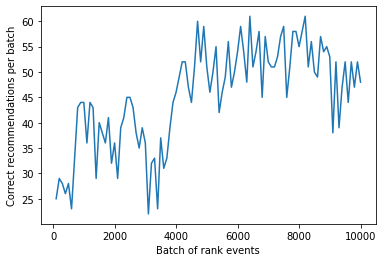

In [25]:
createChart(count, rewards)

## チャートを読む

このグラフは、現在のデフォルトの学習ポリシーでのモデルの成功率を示しています。

![このグラフには、テスト期間中に現在の学習ポリシーが成功したことが示されています。](./media/azure-notebook-chart-results.png)


理想的な目標は、テストが終了するまでに、このループの平均成功率が **100%** から探索を差し引いた割合に近くなることです。探索の既定値は **20%** です。

`100-20=80`

この探索値は、Azure ポータルの Personalizer リソースの [構成] ページで確認できます。

Rank API へのデータをもとに、より良い学習ポリシーを見つけるためには、Personalizer ループのポータルで[オフライン評価](https://docs.microsoft.com/ja-jp/azure/cognitive-services/personalizer/how-to-offline-evaluation)を実行してください。




## オフライン評価の実行

1. Azure ポータルで、Personalizer リソースの **評価** ページを開きます。
1. **評価の作成**を選択します。
1. ループ評価の評価名と日付範囲の必要なデータを入力します。日付範囲には、評価に重点を置いている日のみを含める必要があります。

    ![Azure portal で、Personalizer リソースの [評価] ページを開きます。 [評価の作成] を選択します。 評価名と日付範囲を入力します。](./media/create-offline-evaluation.png)

このオフライン評価を実行する目的は、このループで使用される特徴量とアクションに対して、より良い学習ポリシーがあるかどうかを判断することです。より良い学習ポリシーを見つけるには、**[最適化の検出]** がオンになっていることを確認してください。

1. **OK** を選択して評価を開始します。
1. この**評価**ページには、新しい評価と現在のステータスが表示されます。データの量によっては、この評価に時間がかかる場合があります。数分後にこのページに戻り、結果を確認することができます。
1. 評価が完了したら、評価を選択して、**さまざまな学習ポリシーの比較**を選択します。これは、利用可能な学習ポリシーと、それらがデータを使ってどのように動作するかを示しています。
1. 表の中で一番上の学習ポリシーを選択し、**適用**を選択します。これにより、"最適な" 学習ポリシーがモデルに適用され、再トレーニングが行われます。

## モデルの更新頻度を5分に変更

1. Azure ポータルで、Personalizer リソース上で、リソース管理セクションの下の構成タブを選択します。
1. **モデルの更新頻度**と**報酬の待機時間**を **5分** に変更し、**保存**を選択します。

[報酬の待機時間](https://docs.microsoft.com/azure/cognitive-services/personalizer/concept-rewards#reward-wait-time)、[モデルの更新頻度](https://docs.microsoft.com/azure/cognitive-services/personalizer/how-to-settings#model-update-frequency)についてはこちらをご覧ください。


In [26]:
# 新しい学習ポリシーと時間を明確にする
get_service_settings()

-----checking service settings
<Response [200]>
{'name': 'fde432dc01b1471ebc354f49ec319e4f', 'arguments': '--cb_explore_adf --epsilon 0.20000000298023224 --power_t 0 -l 0.001 --cb_type mtr -q ::'}
<Response [200]>
{'rewardWaitTime': 'PT15S', 'defaultReward': 0.0, 'rewardAggregation': 'earliest', 'explorationPercentage': 0.2, 'modelExportFrequency': 'PT15S', 'logRetentionDays': -1, 'modelAutoPublish': True, 'stagedModelHistoryLength': 10, 'lastConfigurationEditDate': '2021-01-22T02:51:10', 'learningMode': 'Online'}


出力の `rewardWaitTime` と `modelExportFrequency` がともに 5分 に設定されていることを確認します。

```console
-----checking model
<Response [200]>
{'creationTime': '0001-01-01T00:00:00+00:00', 'lastModifiedTime': '0001-01-01T00:00:00+00:00'}
-----model updated: "0001-01-01T00:00:00+00:00"
-----checking service settings
<Response [200]>
{...learning policy...}
<Response [200]>
{'rewardWaitTime': '00:05:00', 'defaultReward': 0.0, 'rewardAggregation': 'earliest', 'explorationPercentage': 0.2, 'modelExportFrequency': '00:05:00', 'logRetentionDays': -1}
User count 4
Coffee count 4
```

## 2,000回の実験を繰り返して新しい学習ポリシーを検証する

ノートブックに戻り、同じループを実行して続行しますが、2,000 回だけ繰り返します。Azure ポータルのメトリクスチャートを定期的に更新して、サービスへの総コール数を確認します。ループの繰り返しごとにランクと報酬のコールである 4,000 コール程度になったら、繰り返しは終了です。

In [0]:
# max iterations
num_requests = 2000

# check last mod date N% of time - currently 10%
lastModCheck2 = int(num_requests * .10)

jsonTemplate2 = rankactionsjsonobj

# main iterations
[count2, rewards2] = iterations(num_requests, lastModCheck2, jsonTemplate2)

## 2,000ランクリクエストのチャートを実行

`createChart`関数を実行します。

In [0]:
createChart(count2,rewards2)


## 2 つ目のグラフを確認する

2 つ目のグラフでは、ユーザーの好みに合ったランクの予測が明らかに増加していることが示されます。

![2 つ目のグラフでは、ユーザーの好みに合ったランクの予測が明らかに増加していることが示されます。](./media/azure-notebook-chart-results-happy-graph.png)


## リソースのクリーンアップ

チュートリアルシリーズを続行する予定がない場合は、次のリソースをクリーンアップしてください。

* Notebook プロジェクトを削除します。
* Personalizer リソースを削除します。